# Import modules

In [ ]:
library(ggplot2)
library(dplyr)
library(tidyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# Load data

## Foreign exchange rate

In [ ]:
vcb_foreign_exchange_rate <- read.csv("./dataset/clean_dataset/foreign_exchange_rate/vcb_foreign_exchange_rate.csv")
head(vcb_foreign_exchange_rate, 5)

Date       AUD_Cash AUD_Sell AUD_Transfer CAD_Cash CAD_Sell CAD_Transfer
1 2021-12-31 16093.17 16780.26 16255.73     17424.97 18168.92 17600.98    
2 2022-01-01 16093.17 16780.26 16255.73     17424.97 18168.92 17600.98    
3 2022-01-02 16093.17 16780.26 16255.73     17424.97 18168.92 17600.98    
4 2022-01-03 16093.17 16780.26 16255.73     17424.97 18168.92 17600.98    
5 2022-01-04 15975.54 16657.61 16136.91     17412.67 18156.10 17588.55    
  CHF_Cash CHF_Sell CHF_Transfer ⋯ JPY_Cash JPY_Sell JPY_Transfer SGD_Cash
1 24306.81 25344.58 24552.33     ⋯ 192.01   203.26   193.95       16420.90
2 24306.81 25344.58 24552.33     ⋯ 192.01   203.26   193.95       16420.90
3 24306.81 25344.58 24552.33     ⋯ 192.01   203.26   193.95       16420.90
4 24306.81 25344.58 24552.33     ⋯ 192.01   203.26   193.95       16420.90
5 24187.63 25220.32 24431.95     ⋯ 191.53   202.75   193.46       16408.76
  SGD_Sell SGD_Transfer THB_Cash THB_Sell THB_Transfer USD_Cash
1 17121.98 16586.76     603.35   696.19   670.39       22610   
2 17121.98 16586.76     603.35   696.19   670.39       22610   
3 17121.98 16586.76     603.35   696.19   670.39       22610   
4 17121.98 16586.76     603.35   696.19   670.39       22610   
5 17109.33 16574.50     605.71   698.91   673.02       22610

In [ ]:
bid_foreign_exchange_rate <- read.csv("./dataset/clean_dataset/foreign_exchange_rate/bid_foreign_exchange_rate.csv")
head(bid_foreign_exchange_rate, 5)

Date       AUD_Cash AUD_Sell AUD_Transfer CAD_Cash CAD_Sell CAD_Transfer
1 2022-01-01 16213    16855    16311        17520    18251    17626       
2 2022-01-02 16213    16855    16311        17520    18251    17626       
3 2022-01-03 16213    16855    16311        17520    18251    17626       
4 2022-01-04 16028    16672    16125        17457    18188    17562       
5 2022-01-05 16071    16708    16168        17467    18194    17572       
  CHF_Cash CHF_Sell CHF_Transfer ⋯ JPY_Cash JPY_Sell JPY_Transfer SGD_Cash
1 24429    25431    24577        ⋯ 193.30   203.64   194.47       16538   
2 24429    25431    24577        ⋯ 193.30   203.64   194.47       16538   
3 24429    25431    24577        ⋯ 193.30   203.64   194.47       16538   
4 24211    25213    24357        ⋯ 191.88   202.14   193.03       16416   
5 24255    25251    24402        ⋯ 191.14   201.33   192.30       16399   
  SGD_Sell SGD_Transfer THB_Cash THB_Sell THB_Transfer USD_Cash
1 17186    16637        651.07   717.95   657.65       22635   
2 17186    16637        651.07   717.95   657.65       22635   
3 17186    16637        651.07   717.95   657.65       22635   
4 17056    16515        646.13   712.94   652.66       22585   
5 17040    16498        648.19   715.23   654.74       22555

In [ ]:
tcb_foreign_exchange_rate <- read.csv("./dataset/clean_dataset/foreign_exchange_rate/tcb_foreign_exchange_rate.csv")
head(tcb_foreign_exchange_rate, 5)

Date       AUD_Cash AUD_Sell AUD_Transfer CAD_Cash CAD_Sell CAD_Transfer
1 2021-12-31 16033    16929    16299        17363    18264    17635       
2 2022-01-04 15879    16769    16144        17324    18212    17596       
3 2022-01-06 15743    16622    16009        17235    18120    17507       
4 2022-01-07 15697    16577    15962        17301    18189    17573       
5 2022-01-08 15769    16659    16034        17415    18313    17688       
  CHF_Cash CHF_Sell CHF_Transfer ⋯ JPY_Cash JPY_Sell JPY_Transfer SGD_Cash
1 24325    25325    24676        ⋯ 191.08   203.69   194.38       16353   
2 24166    25143    24516        ⋯ 189.61   202.04   192.90       16269   
3 24125    25097    24475        ⋯ 189.58   202.00   192.87       16186   
4 24036    25013    24386        ⋯ 189.11   201.54   192.40       16172   
5 24085    25070    24435        ⋯ 189.51   202.06   192.80       16214   
  SGD_Sell SGD_Transfer THB_Cash THB_Sell THB_Transfer USD_Cash
1 17248    16621        603      718      665          22604   
2 17154    16537        599      714      662          22579   
3 17065    16453        595      709      658          22564   
4 17052    16439        590      705      653          22510   
5 17106    16481        591      706      654          22515

## Exchange market

In [ ]:
usd_exchange_market <- read.csv("./dataset/clean_dataset/exchange_market.csv")
head(usd_exchange_market, 5)

Time       Value
1 2022-01-03 22855
2 2022-01-04 22756
3 2022-01-05 22760
4 2022-01-06 22748
5 2022-01-07 22755

# Process data

In [ ]:
data.frame(Column = names(vcb_foreign_exchange_rate),
           Class = sapply(vcb_foreign_exchange_rate, class))

Column       Class    
Date         Date         character
AUD_Cash     AUD_Cash     numeric  
AUD_Sell     AUD_Sell     numeric  
AUD_Transfer AUD_Transfer numeric  
CAD_Cash     CAD_Cash     numeric  
CAD_Sell     CAD_Sell     numeric  
CAD_Transfer CAD_Transfer numeric  
CHF_Cash     CHF_Cash     numeric  
CHF_Sell     CHF_Sell     numeric  
CHF_Transfer CHF_Transfer numeric  
EUR_Cash     EUR_Cash     numeric  
EUR_Sell     EUR_Sell     numeric  
EUR_Transfer EUR_Transfer numeric  
GBP_Cash     GBP_Cash     numeric  
GBP_Sell     GBP_Sell     numeric  
GBP_Transfer GBP_Transfer numeric  
JPY_Cash     JPY_Cash     numeric  
JPY_Sell     JPY_Sell     numeric  
JPY_Transfer JPY_Transfer numeric  
SGD_Cash     SGD_Cash     numeric  
SGD_Sell     SGD_Sell     numeric  
SGD_Transfer SGD_Transfer numeric  
THB_Cash     THB_Cash     numeric  
THB_Sell     THB_Sell     numeric  
THB_Transfer THB_Transfer numeric  
USD_Cash     USD_Cash     numeric

In [ ]:
data.frame(Column = names(bid_foreign_exchange_rate),
           Class = sapply(bid_foreign_exchange_rate, class))

Column       Class    
Date         Date         character
AUD_Cash     AUD_Cash     numeric  
AUD_Sell     AUD_Sell     numeric  
AUD_Transfer AUD_Transfer numeric  
CAD_Cash     CAD_Cash     numeric  
CAD_Sell     CAD_Sell     numeric  
CAD_Transfer CAD_Transfer numeric  
CHF_Cash     CHF_Cash     numeric  
CHF_Sell     CHF_Sell     numeric  
CHF_Transfer CHF_Transfer numeric  
EUR_Cash     EUR_Cash     numeric  
EUR_Sell     EUR_Sell     numeric  
EUR_Transfer EUR_Transfer numeric  
GBP_Cash     GBP_Cash     numeric  
GBP_Sell     GBP_Sell     numeric  
GBP_Transfer GBP_Transfer numeric  
JPY_Cash     JPY_Cash     numeric  
JPY_Sell     JPY_Sell     numeric  
JPY_Transfer JPY_Transfer numeric  
SGD_Cash     SGD_Cash     numeric  
SGD_Sell     SGD_Sell     numeric  
SGD_Transfer SGD_Transfer numeric  
THB_Cash     THB_Cash     numeric  
THB_Sell     THB_Sell     numeric  
THB_Transfer THB_Transfer numeric  
USD_Cash     USD_Cash     numeric

In [ ]:
data.frame(Column = names(tcb_foreign_exchange_rate),
           Class = sapply(tcb_foreign_exchange_rate, class))

Column       Class    
Date         Date         character
AUD_Cash     AUD_Cash     numeric  
AUD_Sell     AUD_Sell     numeric  
AUD_Transfer AUD_Transfer numeric  
CAD_Cash     CAD_Cash     numeric  
CAD_Sell     CAD_Sell     numeric  
CAD_Transfer CAD_Transfer numeric  
CHF_Cash     CHF_Cash     numeric  
CHF_Sell     CHF_Sell     numeric  
CHF_Transfer CHF_Transfer numeric  
EUR_Cash     EUR_Cash     numeric  
EUR_Sell     EUR_Sell     numeric  
EUR_Transfer EUR_Transfer numeric  
GBP_Cash     GBP_Cash     numeric  
GBP_Sell     GBP_Sell     numeric  
GBP_Transfer GBP_Transfer numeric  
JPY_Cash     JPY_Cash     numeric  
JPY_Sell     JPY_Sell     numeric  
JPY_Transfer JPY_Transfer numeric  
SGD_Cash     SGD_Cash     numeric  
SGD_Sell     SGD_Sell     numeric  
SGD_Transfer SGD_Transfer numeric  
THB_Cash     THB_Cash     numeric  
THB_Sell     THB_Sell     numeric  
THB_Transfer THB_Transfer numeric  
USD_Cash     USD_Cash     numeric

In [ ]:
data.frame(Column = names(usd_exchange_market),
           Class = sapply(usd_exchange_market, class))

Column Class    
Time  Time   character
Value Value  numeric

In [ ]:
vcb_foreign_exchange_rate$Date <- as.Date(vcb_foreign_exchange_rate$Date)
head(vcb_foreign_exchange_rate, 5)

Date       AUD_Cash AUD_Sell AUD_Transfer CAD_Cash CAD_Sell CAD_Transfer
1 2021-12-31 16093.17 16780.26 16255.73     17424.97 18168.92 17600.98    
2 2022-01-01 16093.17 16780.26 16255.73     17424.97 18168.92 17600.98    
3 2022-01-02 16093.17 16780.26 16255.73     17424.97 18168.92 17600.98    
4 2022-01-03 16093.17 16780.26 16255.73     17424.97 18168.92 17600.98    
5 2022-01-04 15975.54 16657.61 16136.91     17412.67 18156.10 17588.55    
  CHF_Cash CHF_Sell CHF_Transfer ⋯ JPY_Cash JPY_Sell JPY_Transfer SGD_Cash
1 24306.81 25344.58 24552.33     ⋯ 192.01   203.26   193.95       16420.90
2 24306.81 25344.58 24552.33     ⋯ 192.01   203.26   193.95       16420.90
3 24306.81 25344.58 24552.33     ⋯ 192.01   203.26   193.95       16420.90
4 24306.81 25344.58 24552.33     ⋯ 192.01   203.26   193.95       16420.90
5 24187.63 25220.32 24431.95     ⋯ 191.53   202.75   193.46       16408.76
  SGD_Sell SGD_Transfer THB_Cash THB_Sell THB_Transfer USD_Cash
1 17121.98 16586.76     603.35   696.19   670.39       22610   
2 17121.98 16586.76     603.35   696.19   670.39       22610   
3 17121.98 16586.76     603.35   696.19   670.39       22610   
4 17121.98 16586.76     603.35   696.19   670.39       22610   
5 17109.33 16574.50     605.71   698.91   673.02       22610

In [ ]:
bid_foreign_exchange_rate$Date <- as.Date(bid_foreign_exchange_rate$Date)

In [ ]:
tcb_foreign_exchange_rate$Date <- as.Date(tcb_foreign_exchange_rate$Date)

In [ ]:
usd_exchange_market$Time <- as.Date(usd_exchange_market$Time)

# Perform descriptive statistics

In [ ]:
summary(vcb_foreign_exchange_rate)

      Date               AUD_Cash        AUD_Sell      AUD_Transfer  
 Min.   :2021-12-31   Min.   :14609   Min.   :15231   Min.   :14756  
 1st Qu.:2022-10-23   1st Qu.:15397   1st Qu.:16070   1st Qu.:15552  
 Median :2023-08-16   Median :15750   Median :16420   Median :15909  
 Mean   :2023-08-16   Mean   :15759   Mean   :16432   Mean   :15918  
 3rd Qu.:2024-06-07   3rd Qu.:16092   3rd Qu.:16779   3rd Qu.:16255  
 Max.   :2025-03-31   Max.   :17006   Max.   :17732   Max.   :17178  
    CAD_Cash        CAD_Sell      CAD_Transfer      CHF_Cash    
 Min.   :16646   Min.   :17355   Min.   :16814   Min.   :22446  
 1st Qu.:17227   1st Qu.:17968   1st Qu.:17401   1st Qu.:24243  
 Median :17501   Median :18245   Median :17677   Median :26349  
 Mean   :17498   Mean   :18245   Mean   :17674   Mean   :25964  
 3rd Qu.:17767   3rd Qu.:18523   3rd Qu.:17946   3rd Qu.:27521  
 Max.   :18231   Max.   :18998   Max.   :18415   Max.   :28820  
    CHF_Sell      CHF_Transfer      EUR_Cash        EUR

In [ ]:
summary(bid_foreign_exchange_rate)

      Date               AUD_Cash        AUD_Sell      AUD_Transfer  
 Min.   :2022-01-01   Min.   :14660   Min.   :15232   Min.   :14749  
 1st Qu.:2022-10-22   1st Qu.:15519   1st Qu.:16080   1st Qu.:15602  
 Median :2023-08-15   Median :15842   Median :16422   Median :15921  
 Mean   :2023-08-16   Mean   :15874   Mean   :16435   Mean   :15955  
 3rd Qu.:2024-06-11   3rd Qu.:16219   3rd Qu.:16800   3rd Qu.:16304  
 Max.   :2025-03-31   Max.   :17001   Max.   :17675   Max.   :17103  
                                                                     
    CAD_Cash        CAD_Sell      CAD_Transfer      CHF_Cash    
 Min.   :16728   Min.   :17370   Min.   :16829   Min.   :22523  
 1st Qu.:17376   1st Qu.:17978   1st Qu.:17461   1st Qu.:24338  
 Median :17616   Median :18248   Median :17707   Median :26473  
 Mean   :17621   Mean   :18239   Mean   :17711   Mean   :26128  
 3rd Qu.:17898   3rd Qu.:18526   3rd Qu.:17984   3rd Qu.:27696  
 Max.   :18412   Max.   :18988   Max.   :18523   M

In [ ]:
summary(tcb_foreign_exchange_rate)

      Date               AUD_Cash        AUD_Sell      AUD_Transfer  
 Min.   :2021-12-31   Min.   :14427   Min.   :15326   Min.   :14687  
 1st Qu.:2022-10-24   1st Qu.:15300   1st Qu.:16194   1st Qu.:15564  
 Median :2023-08-16   Median :15649   Median :16539   Median :15914  
 Mean   :2023-08-17   Mean   :15664   Mean   :16554   Mean   :15929  
 3rd Qu.:2024-06-10   3rd Qu.:16016   3rd Qu.:16906   3rd Qu.:16283  
 Max.   :2025-03-31   Max.   :16943   Max.   :17834   Max.   :17213  
                      NA's   :1       NA's   :1       NA's   :1      
    CAD_Cash        CAD_Sell      CAD_Transfer      CHF_Cash    
 Min.   :16548   Min.   :17446   Min.   :16817   Min.   :22387  
 1st Qu.:17172   1st Qu.:18060   1st Qu.:17444   1st Qu.:24298  
 Median :17444   Median :18334   Median :17717   Median :26412  
 Mean   :17436   Mean   :18328   Mean   :17709   Mean   :26030  
 3rd Qu.:17705   3rd Qu.:18599   3rd Qu.:17979   3rd Qu.:27624  
 Max.   :18191   Max.   :19088   Max.   :18467   M

# Visualize

In [ ]:
col_names <- colnames(vcb_foreign_exchange_rate)[-1]
currencies <- unique(substr(col_names, 1, 3))
currencies

[1] "AUD" "CAD" "CHF" "EUR" "GBP" "JPY" "SGD" "THB" "USD"

## Each foreign currency of each bank

In [ ]:
currencies = c('AUD','CAD','CHF','EUR','GBP','JPY','SGD','THB','USD')

In [136]:
visualize_each_currency_each_bank <- function(dataframe, currency) {
    dataframe_long <- dataframe %>%
      pivot_longer(
        cols = starts_with(currency),
        names_to = "Variable",
        values_to = "Value"
      )

    ggplot(dataframe_long, aes(x = Date, y = Value, color = Variable)) +
      geom_line() +
      labs(title = "Biểu đồ tỷ giá theo thời gian",
          x = "Ngày", y = "Giá trị") +
      theme_minimal()
}

#### Vietcombank

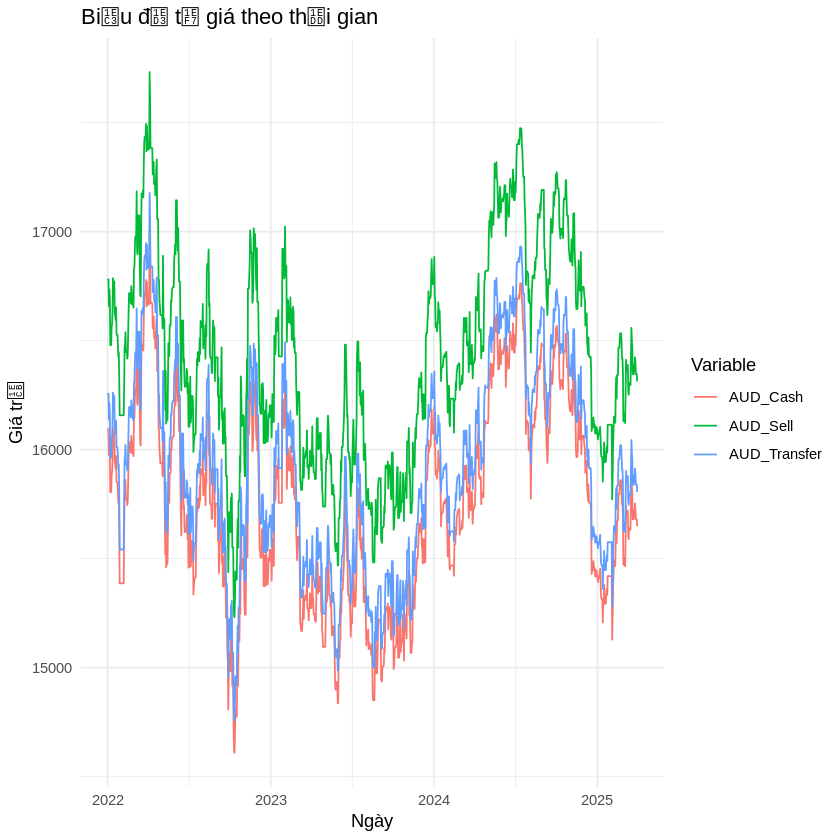

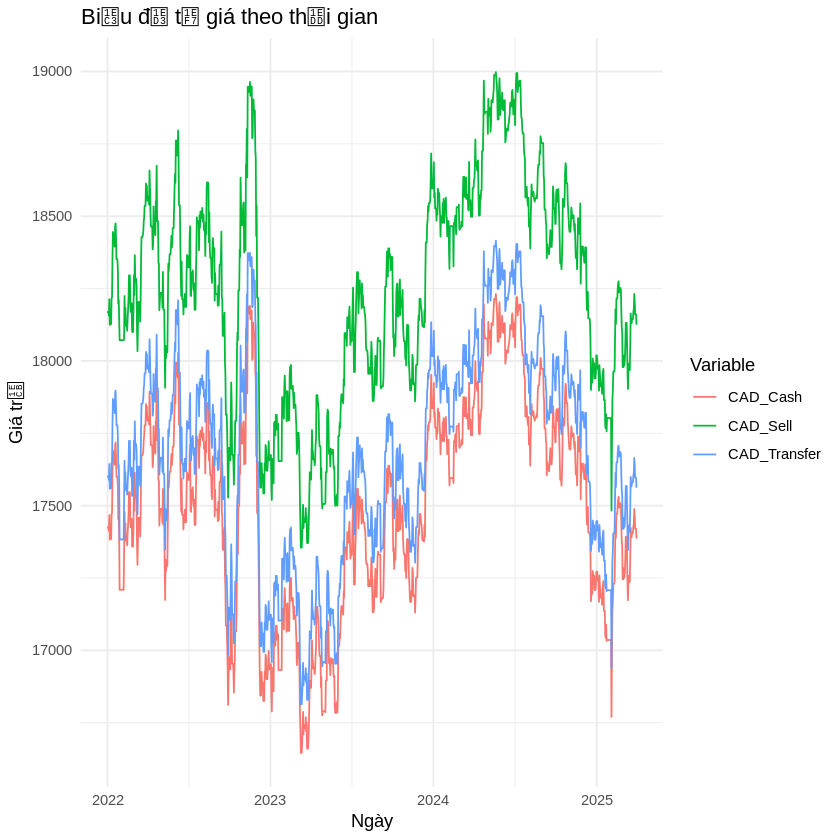

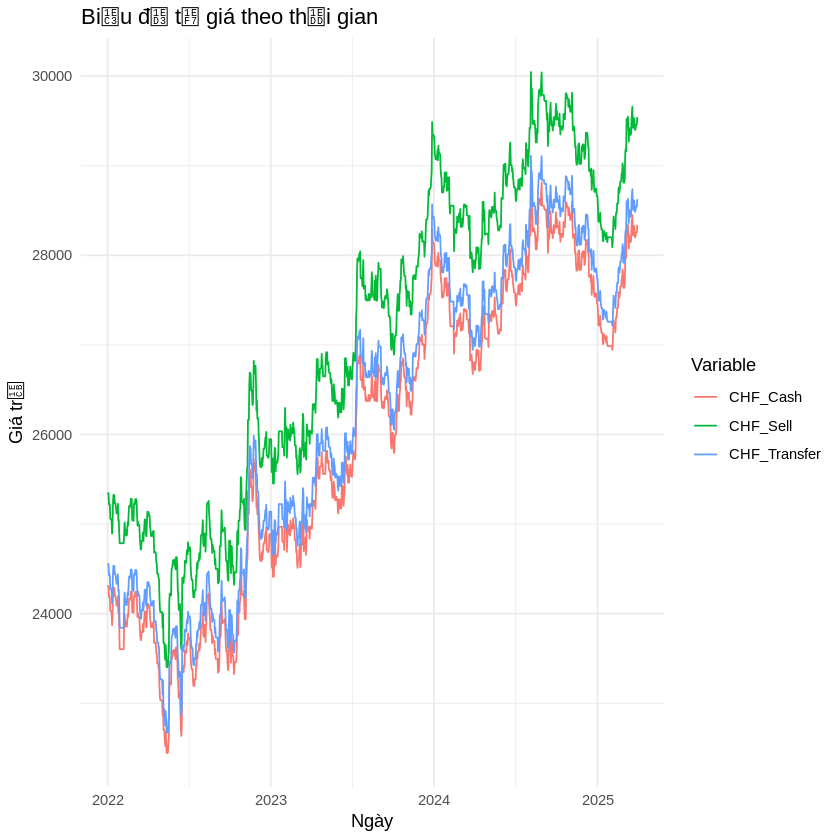

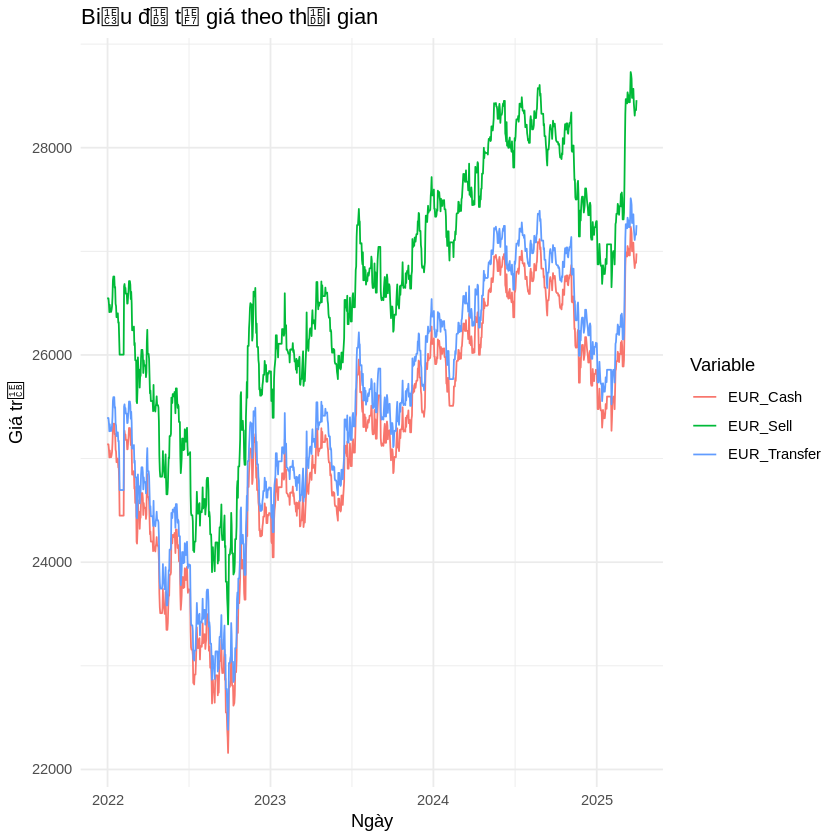

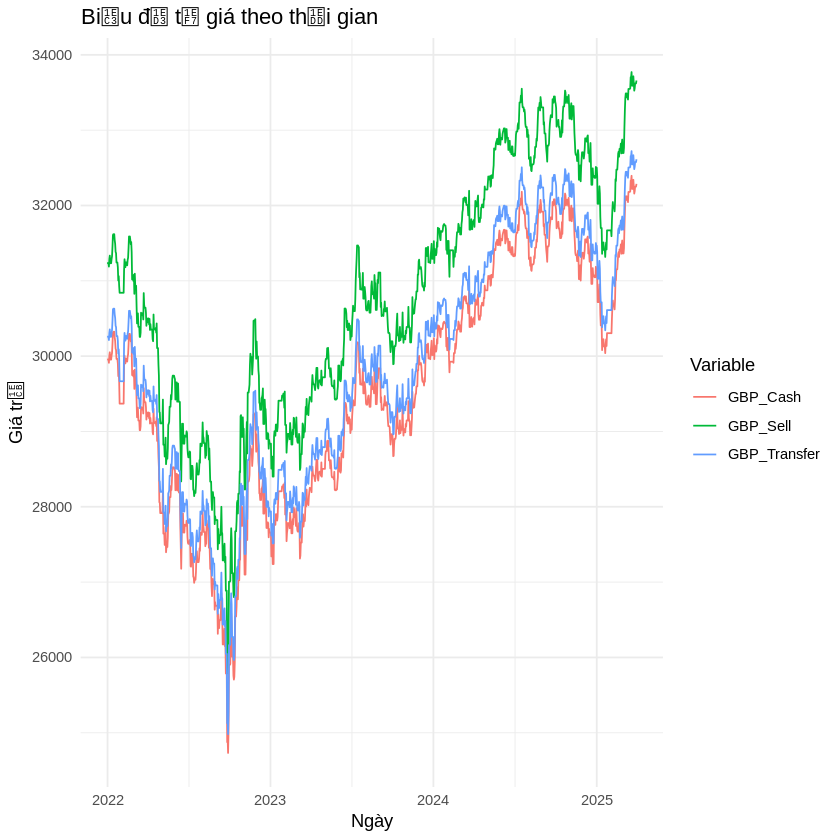

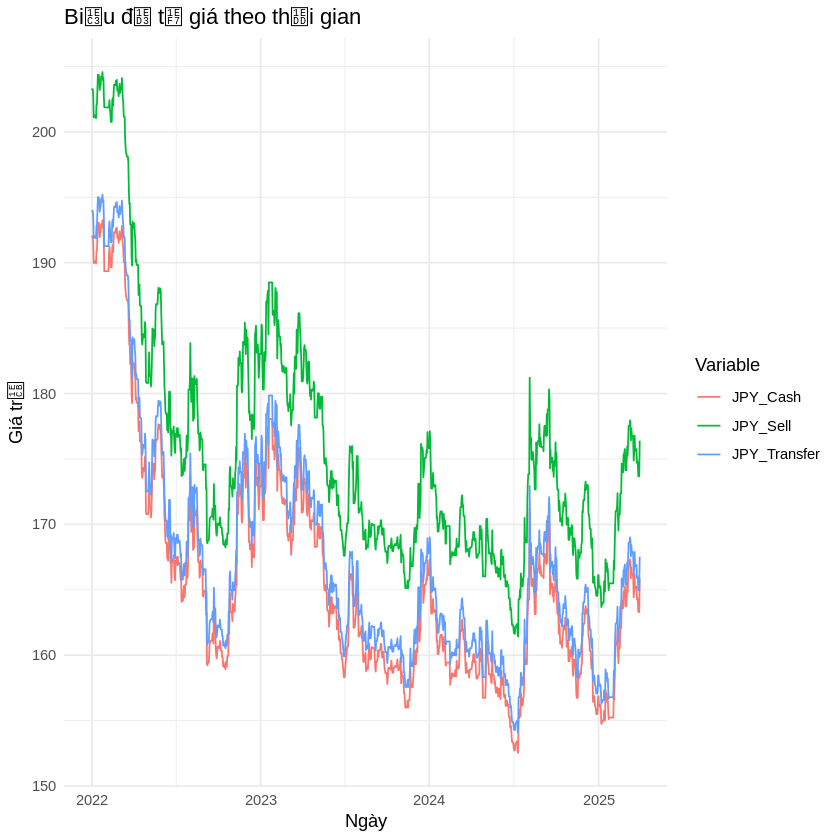

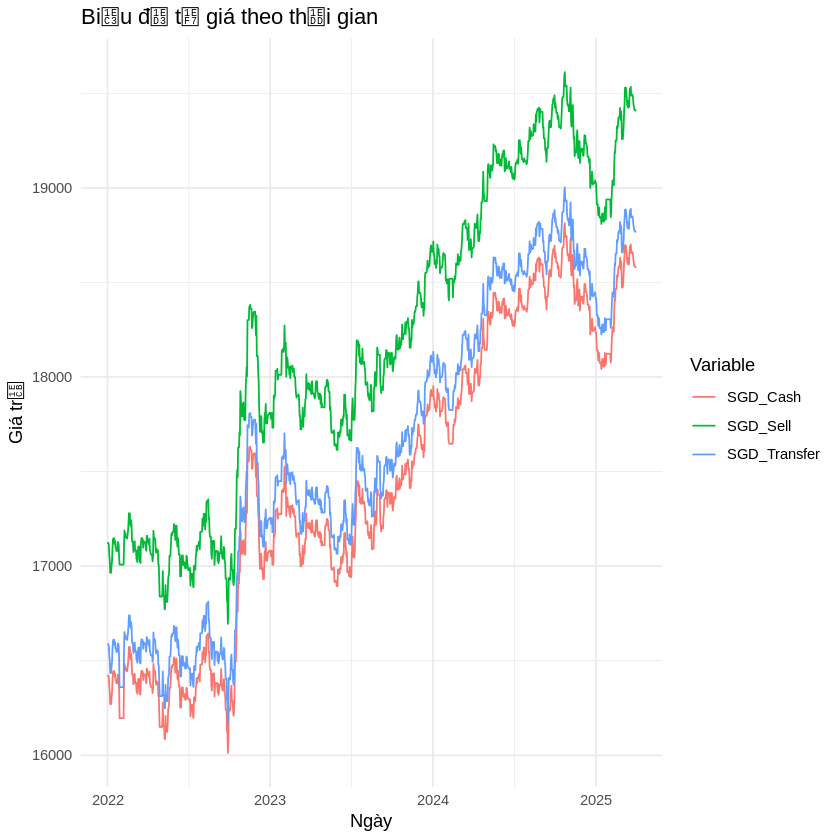

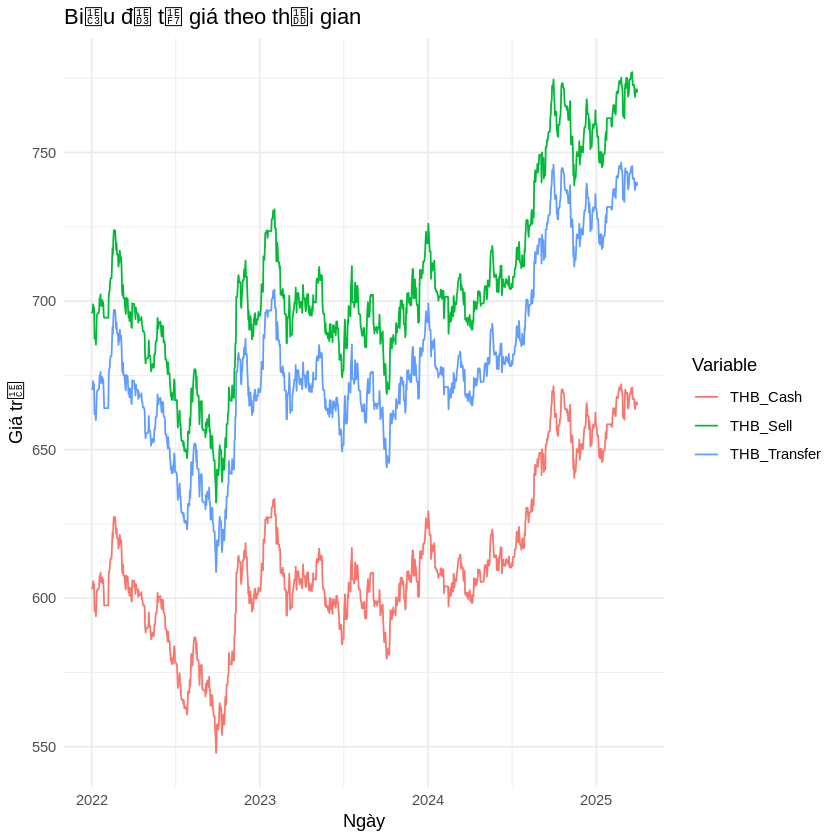

In [ ]:
visualize_each_currency_each_bank(vcb_foreign_exchange_rate, 'AUD')
visualize_each_currency_each_bank(vcb_foreign_exchange_rate, 'CAD')
visualize_each_currency_each_bank(vcb_foreign_exchange_rate, 'CHF')
visualize_each_currency_each_bank(vcb_foreign_exchange_rate, 'EUR')
visualize_each_currency_each_bank(vcb_foreign_exchange_rate, 'GBP')
visualize_each_currency_each_bank(vcb_foreign_exchange_rate, 'JPY')
visualize_each_currency_each_bank(vcb_foreign_exchange_rate, 'SGD')
visualize_each_currency_each_bank(vcb_foreign_exchange_rate, 'THB')

#### BIDV

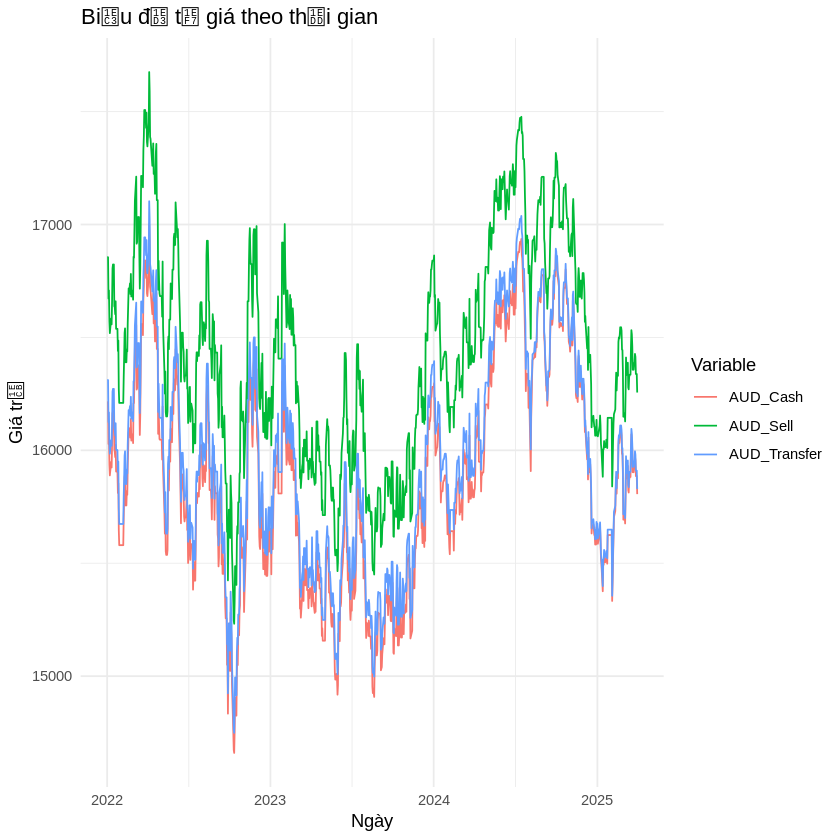

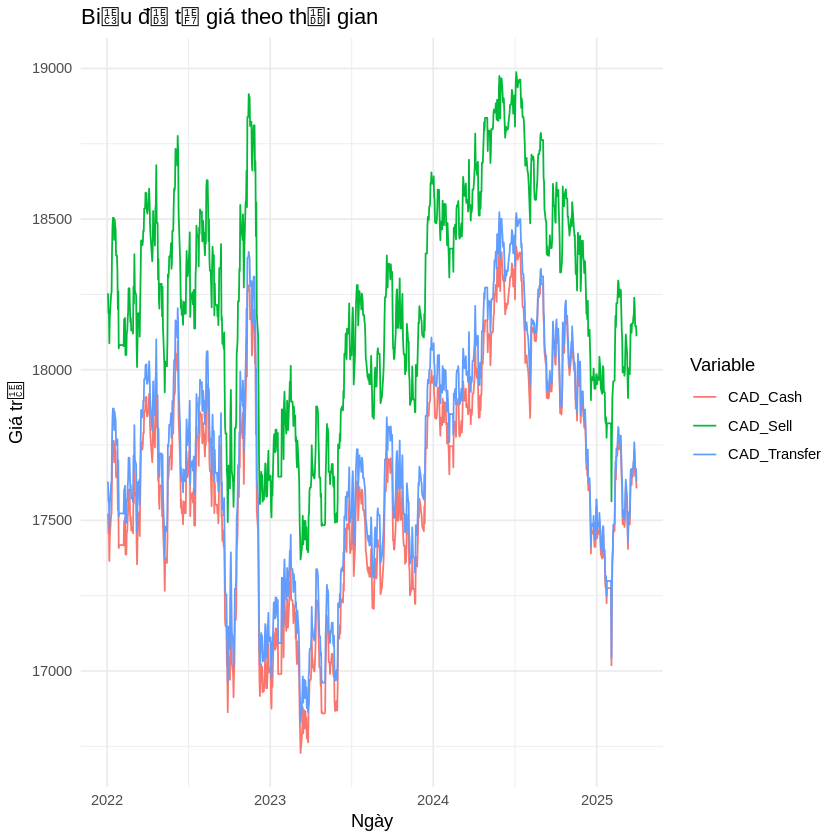

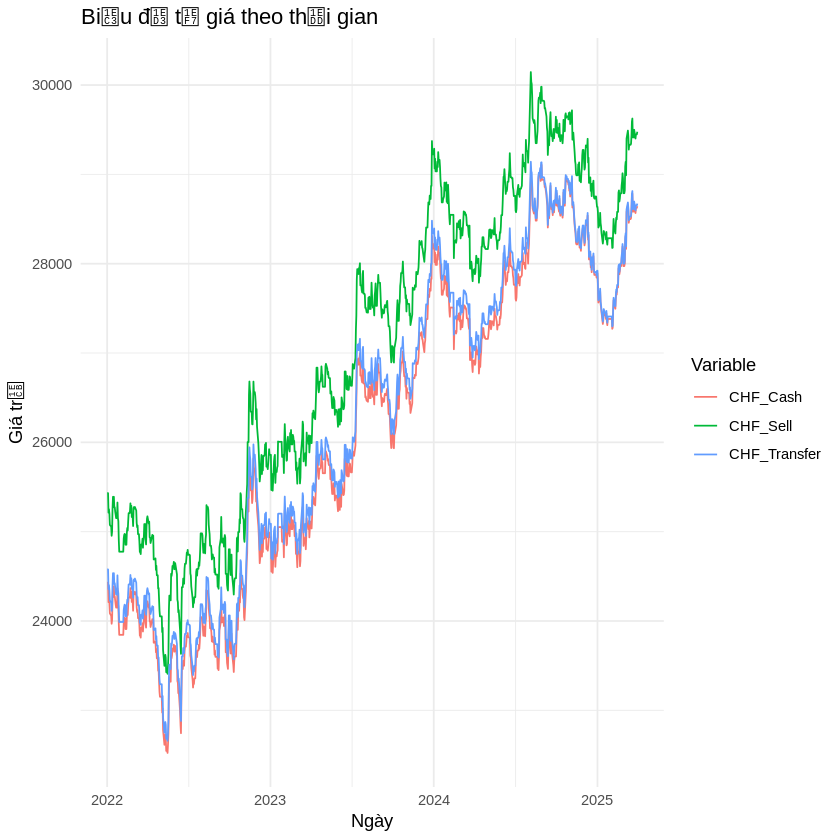

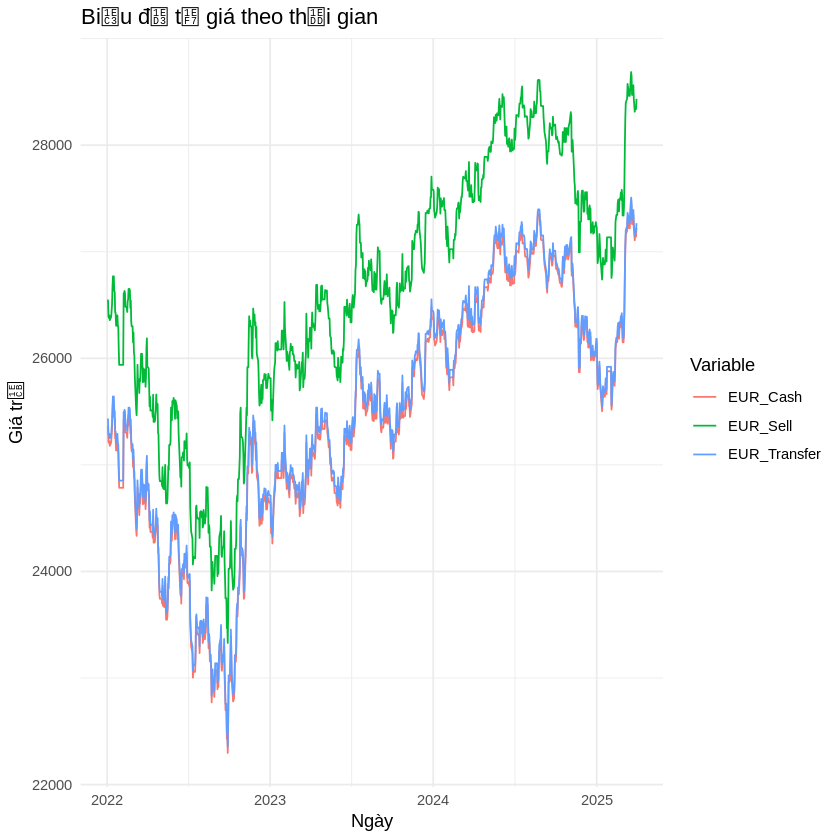

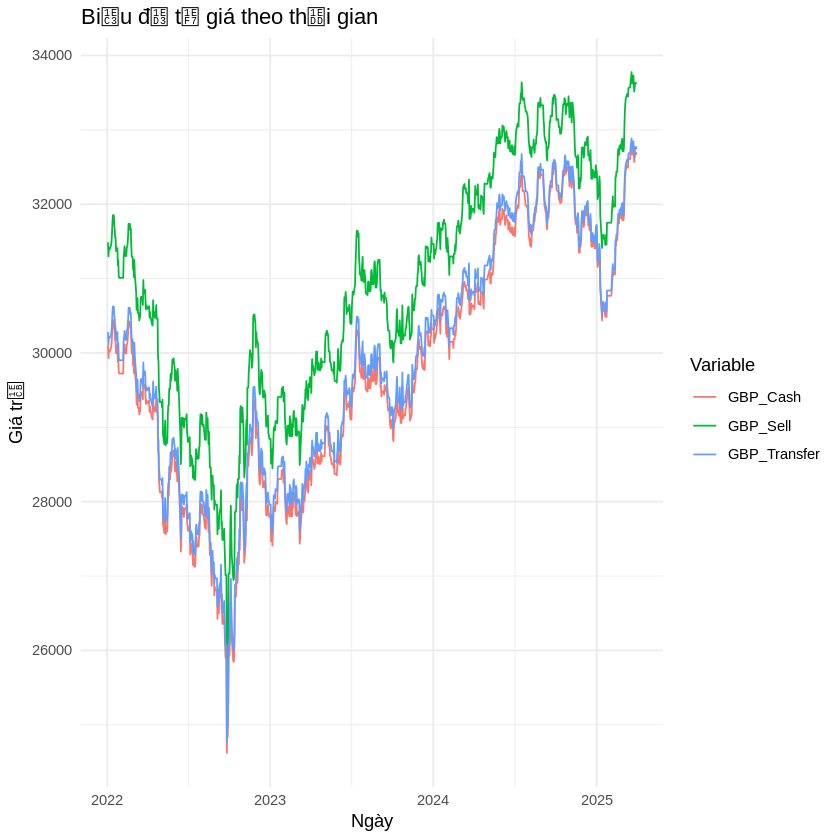

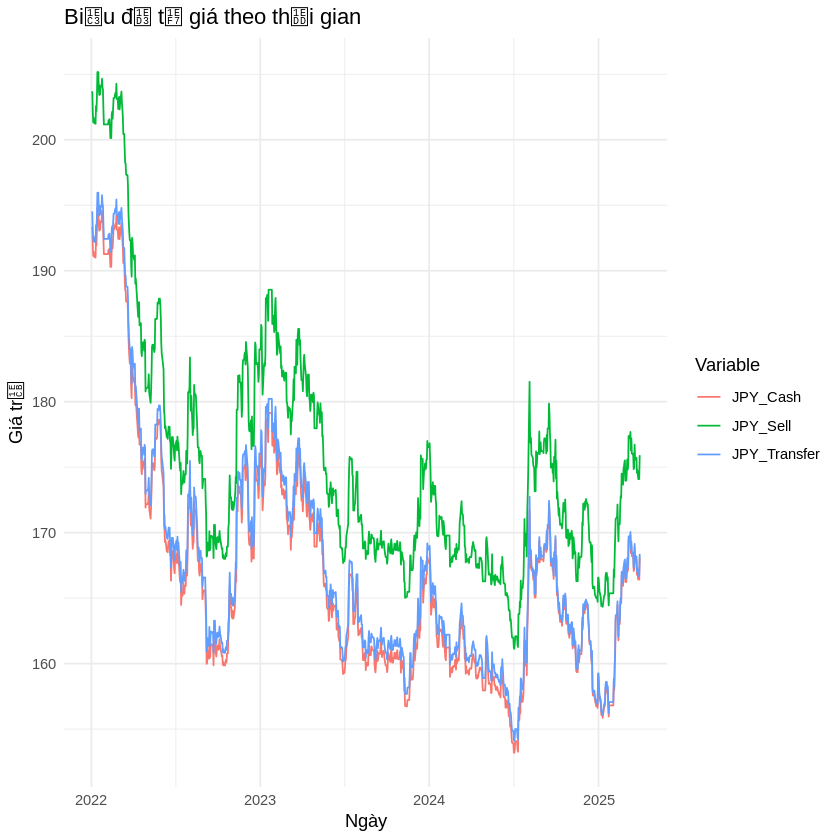

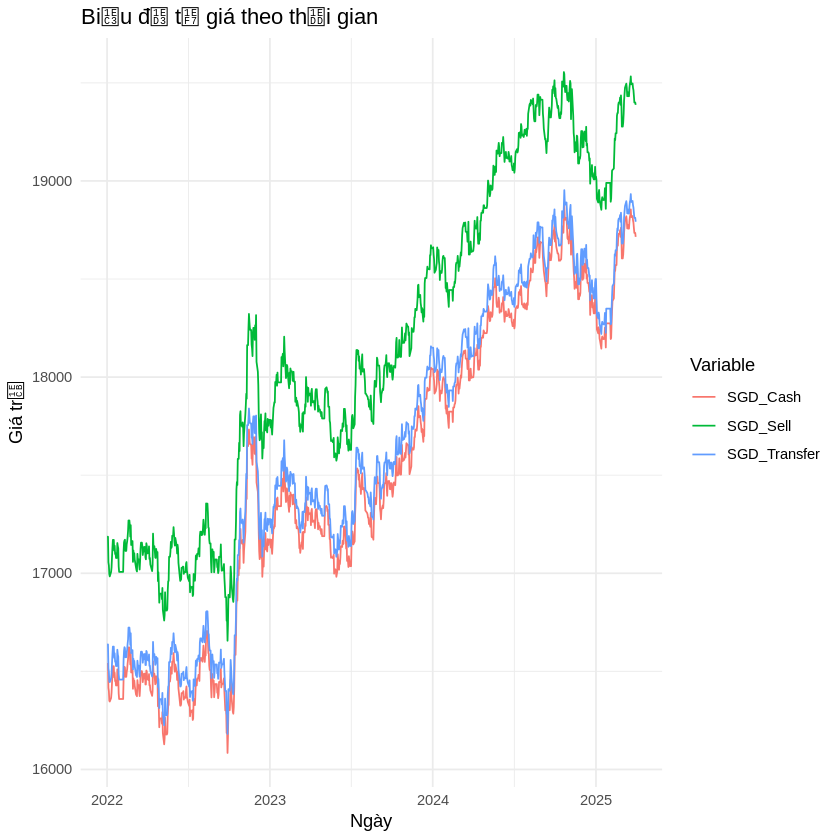

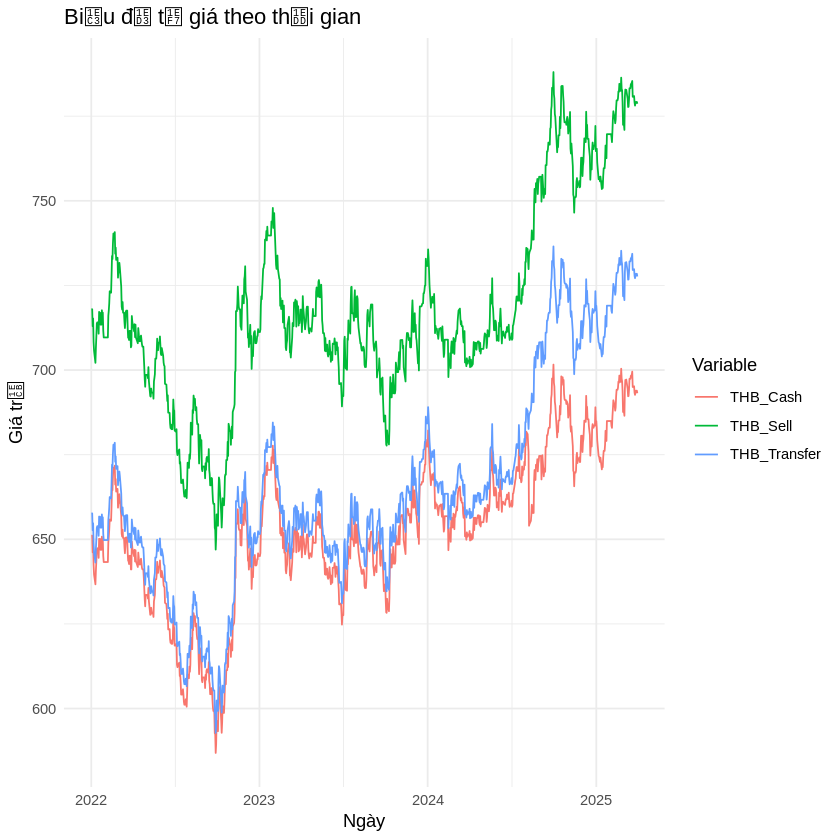

In [ ]:
visualize_each_currency_each_bank(bid_foreign_exchange_rate, 'AUD')
visualize_each_currency_each_bank(bid_foreign_exchange_rate, 'CAD')
visualize_each_currency_each_bank(bid_foreign_exchange_rate, 'CHF')
visualize_each_currency_each_bank(bid_foreign_exchange_rate, 'EUR')
visualize_each_currency_each_bank(bid_foreign_exchange_rate, 'GBP')
visualize_each_currency_each_bank(bid_foreign_exchange_rate, 'JPY')
visualize_each_currency_each_bank(bid_foreign_exchange_rate, 'SGD')
visualize_each_currency_each_bank(bid_foreign_exchange_rate, 'THB')

#### Techcombank

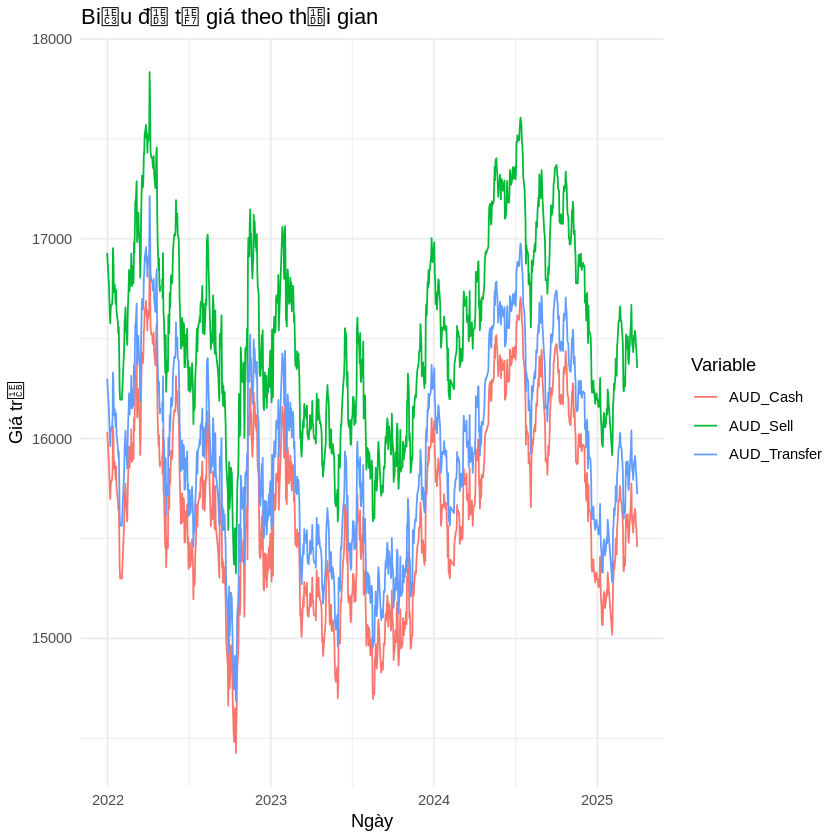

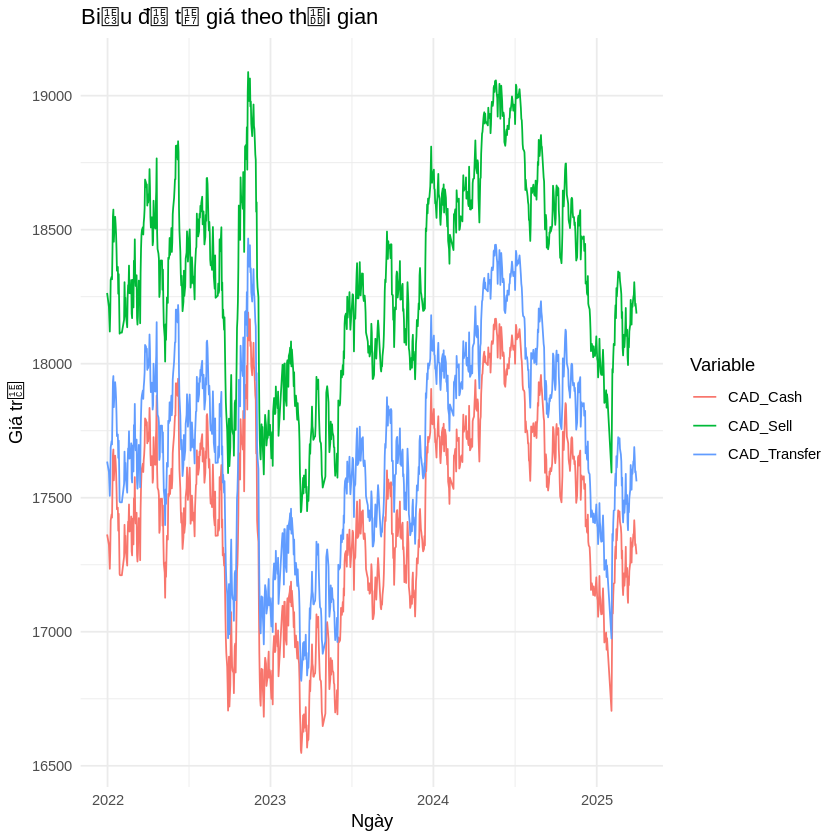

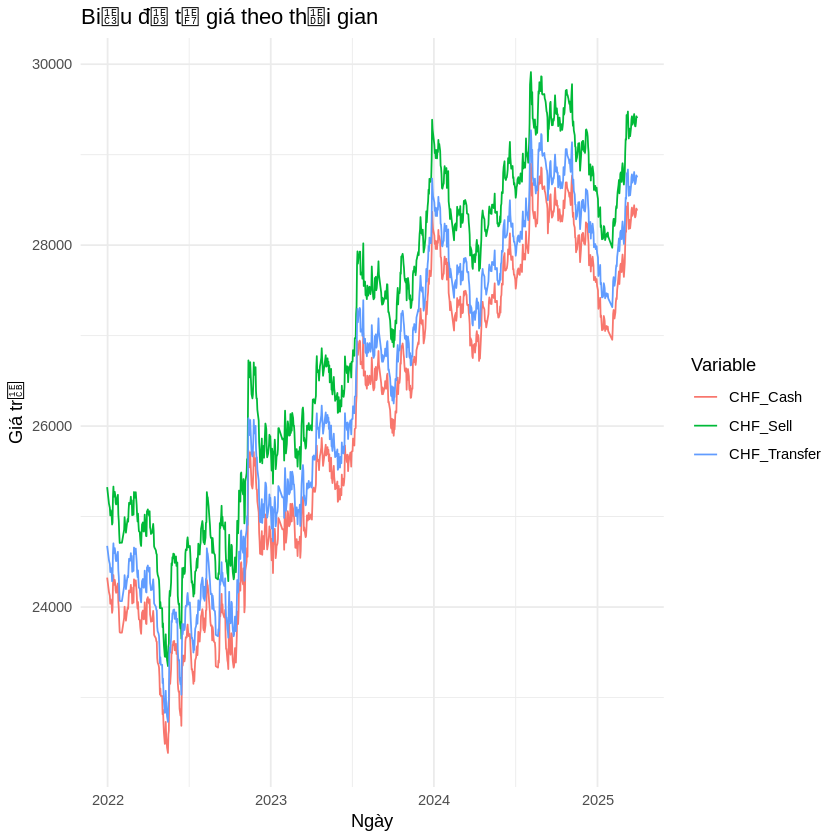

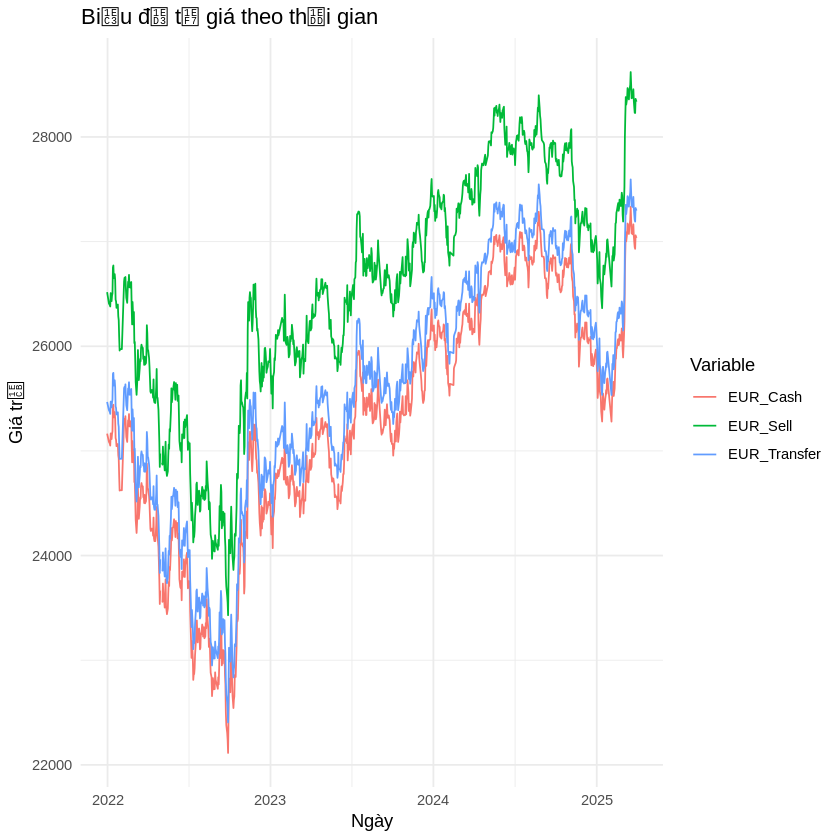

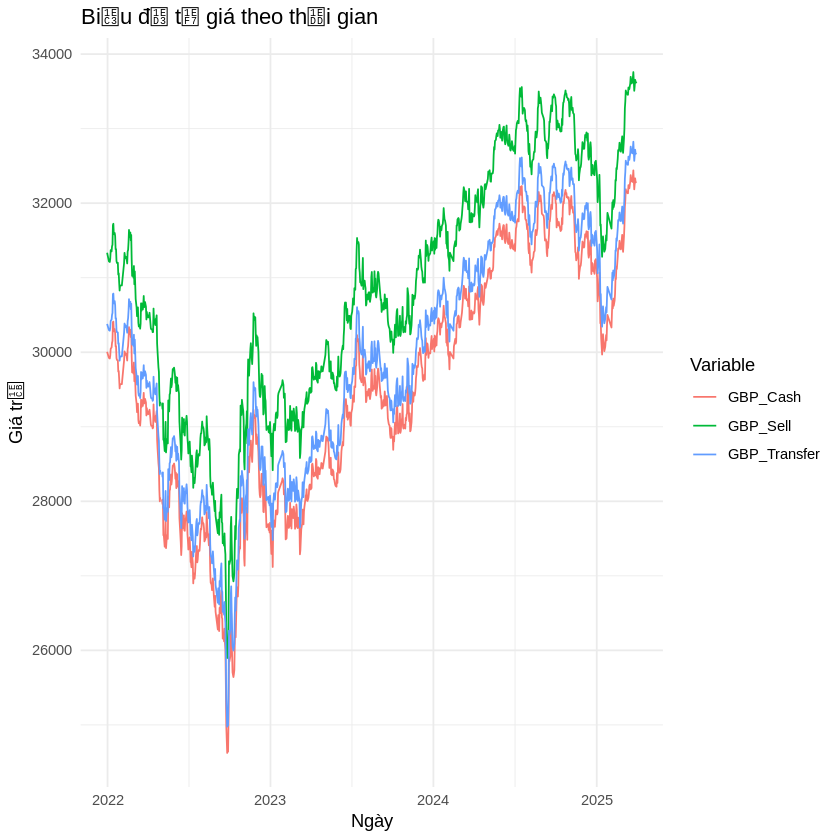

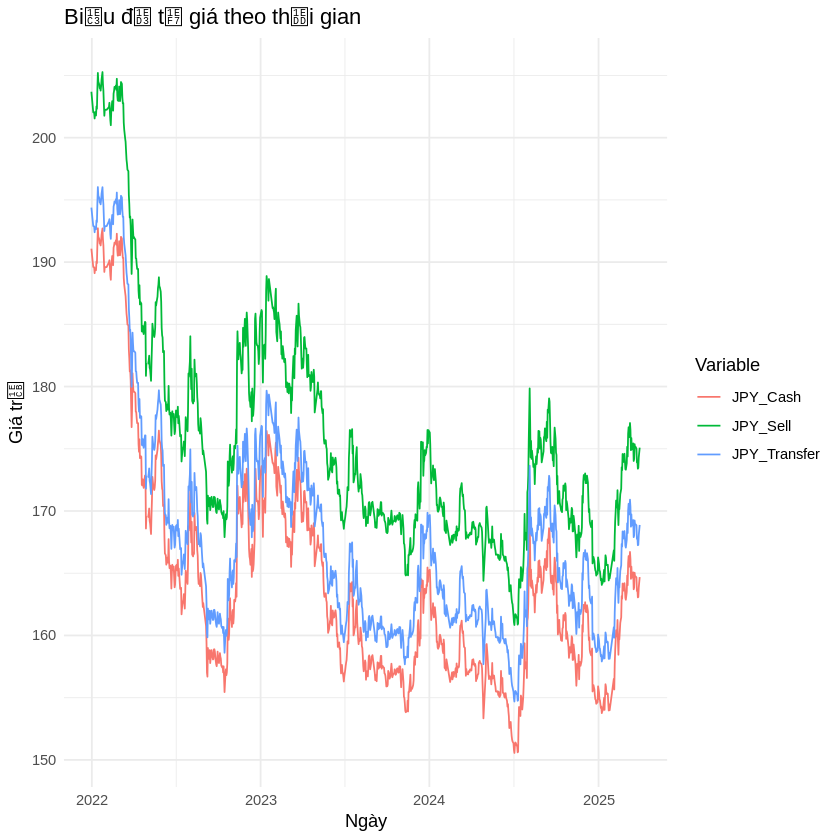

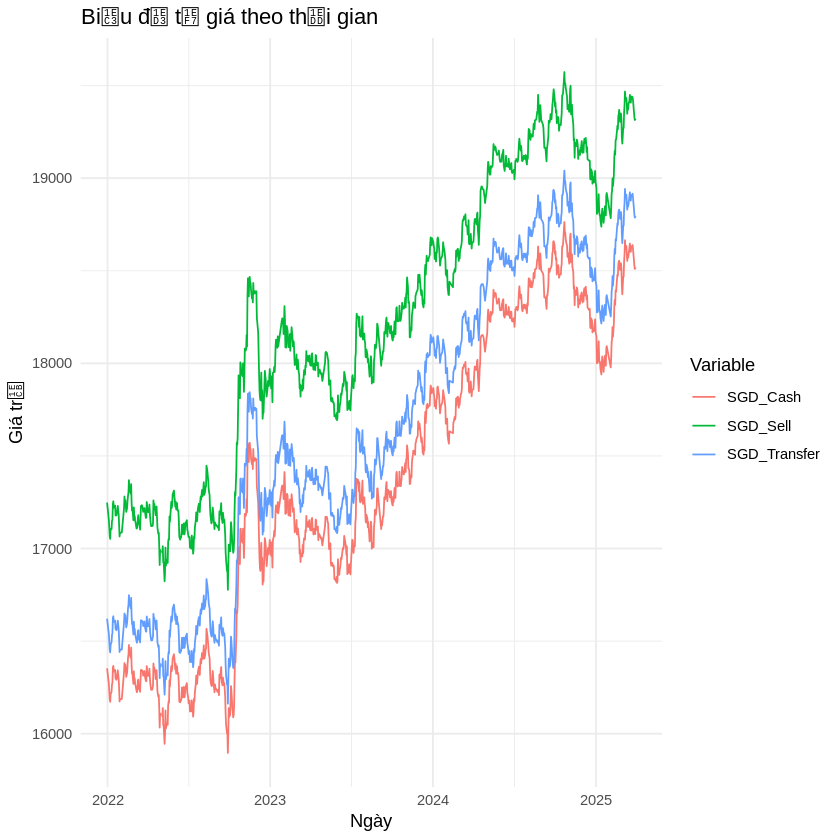

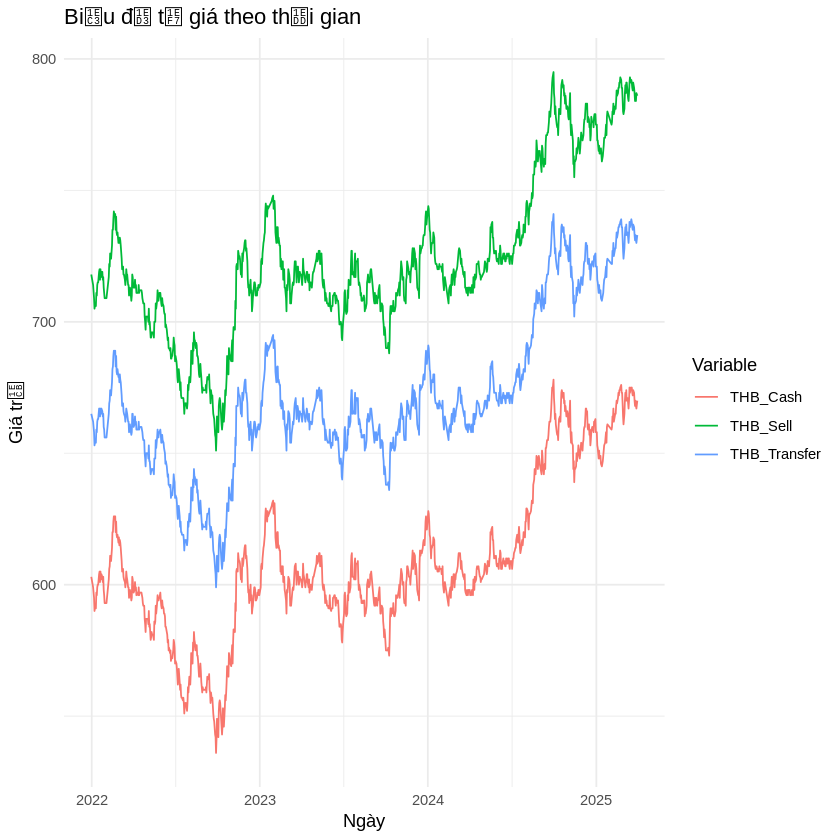

In [ ]:
visualize_each_currency_each_bank(tcb_foreign_exchange_rate, 'AUD')
visualize_each_currency_each_bank(tcb_foreign_exchange_rate, 'CAD')
visualize_each_currency_each_bank(tcb_foreign_exchange_rate, 'CHF')
visualize_each_currency_each_bank(tcb_foreign_exchange_rate, 'EUR')
visualize_each_currency_each_bank(tcb_foreign_exchange_rate, 'GBP')
visualize_each_currency_each_bank(tcb_foreign_exchange_rate, 'JPY')
visualize_each_currency_each_bank(tcb_foreign_exchange_rate, 'SGD')
visualize_each_currency_each_bank(tcb_foreign_exchange_rate, 'THB')

Nhận xét: Từ các biểu đồ trên => Giá mua bằng tiền mặt, giá mua bằng chuyển khoản và giá bán có cùng xu hướng (gần như là giống nhau hoàn toàn) => Chỉ cần chọn 1 biến => Chọn Giá mua bằng tiền mặt (Cash).

## Each bank

In [ ]:
visualize_each_bank <- function(dataframe) {
    dataframe_long <- dataframe %>%
      pivot_longer(
        cols = ends_with("Cash"),
        names_to = "Variable",
        values_to = "Value"
      )

    ggplot(dataframe_long, aes(x = Date, y = Value, color = Variable)) +
      geom_line() +
      labs(title = "Biểu đồ tỷ giá theo thời gian",
          x = "Ngày", y = "Giá trị") +
      theme_minimal()
}

### Vietcombank

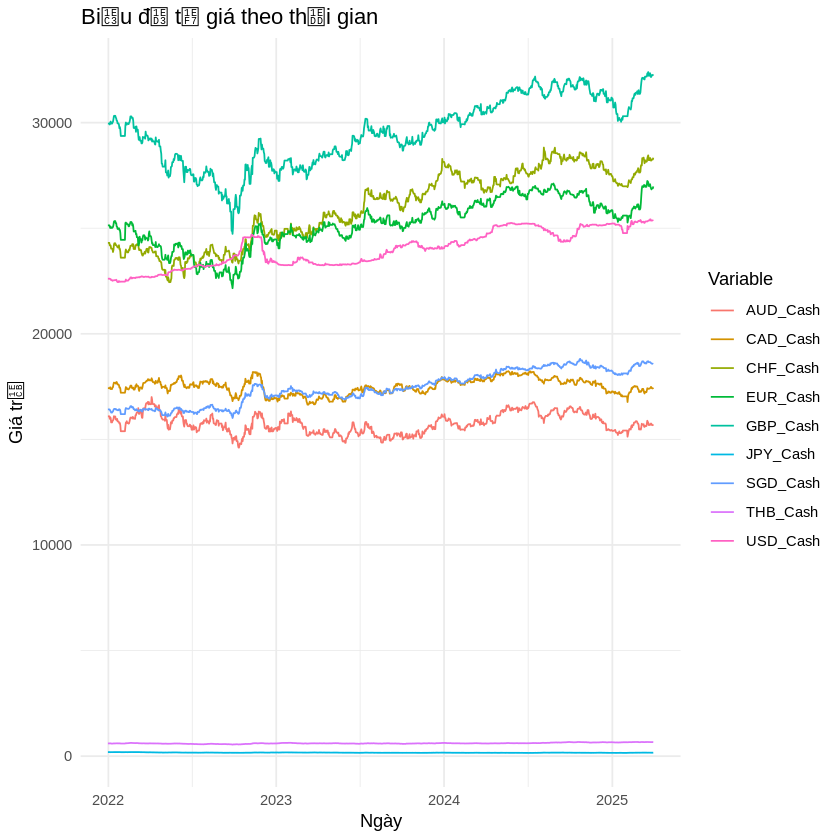

In [ ]:
visualize_each_bank(vcb_foreign_exchange_rate)

### BIDV

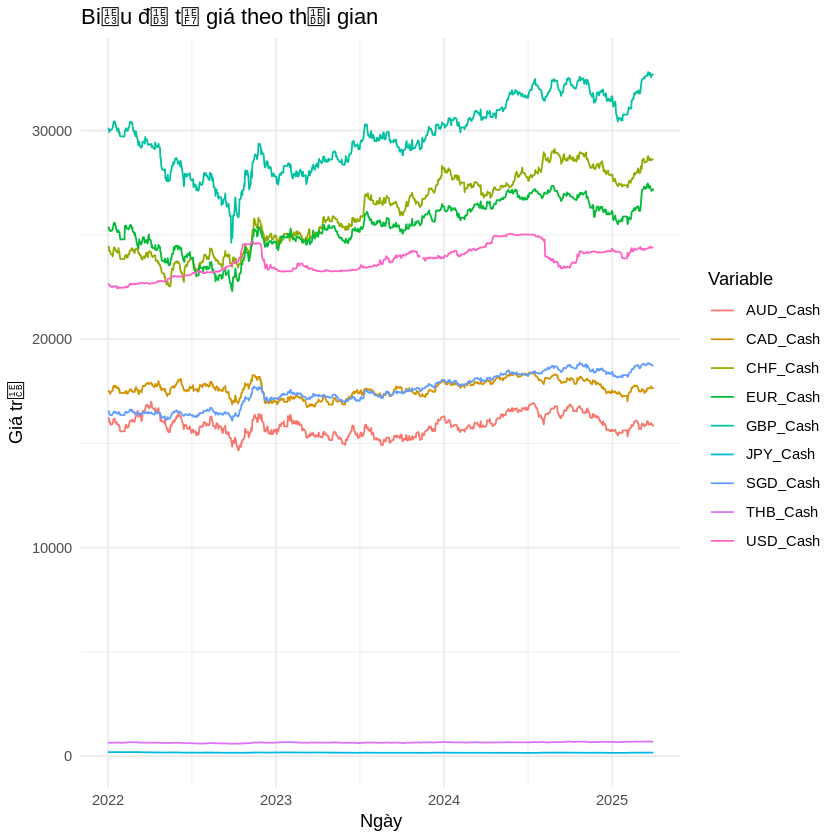

In [ ]:
visualize_each_bank(bid_foreign_exchange_rate)

### Techcombank

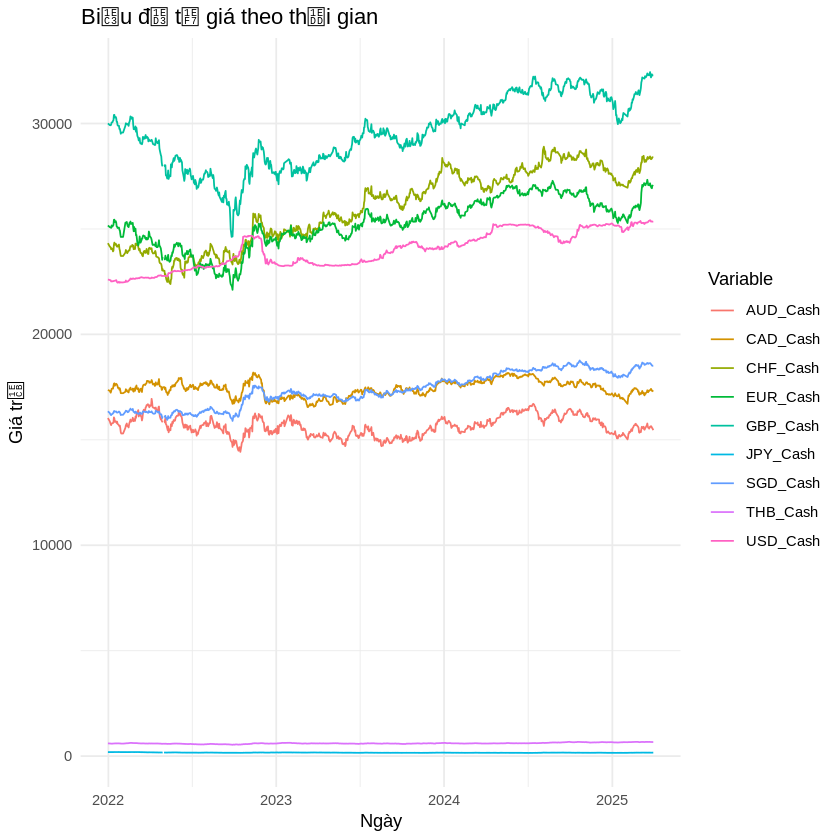

In [ ]:
visualize_each_bank(tcb_foreign_exchange_rate)

## Comparision with exchange market

In [ ]:
colnames(usd_exchange_market)[colnames(usd_exchange_market) == "Value"] <- "Thi_truong_Cash"

In [ ]:
merged_df <- merge(vcb_foreign_exchange_rate, usd_exchange_market, by.x = "Date", by.y = "Time")
head(merged_df, 5)

Date       AUD_Cash AUD_Sell AUD_Transfer CAD_Cash CAD_Sell CAD_Transfer
1 2022-01-03 16093.17 16780.26 16255.73     17424.97 18168.92 17600.98    
2 2022-01-04 15975.54 16657.61 16136.91     17412.67 18156.10 17588.55    
3 2022-01-05 16050.20 16735.49 16212.32     17467.24 18213.03 17643.68    
4 2022-01-06 16005.85 16689.24 16167.53     17382.37 18124.53 17557.95    
5 2022-01-07 15804.71 16479.58 15964.35     17385.02 18127.37 17560.63    
  CHF_Cash CHF_Sell CHF_Transfer ⋯ JPY_Sell JPY_Transfer SGD_Cash SGD_Sell
1 24306.81 25344.58 24552.33     ⋯ 203.26   193.95       16420.90 17121.98
2 24187.63 25220.32 24431.95     ⋯ 202.75   193.46       16408.76 17109.33
3 24200.66 25233.94 24445.11     ⋯ 201.10   191.89       16356.86 17055.24
4 24171.65 25203.69 24415.80     ⋯ 201.14   191.93       16333.97 17031.37
5 24032.07 25058.25 24274.82     ⋯ 201.25   192.03       16270.50 16965.26
  SGD_Transfer THB_Cash THB_Sell THB_Transfer USD_Cash Thi_truong_Cash
1 16586.76     603.35   696.19   670.39       22610    22855          
2 16574.50     605.71   698.91   673.02       22610    22756          
3 16522.08     604.82   697.88   672.02       22590    22760          
4 16498.96     604.82   697.88   672.02       22590    22748          
5 16434.85     595.78   687.46   661.98       22540    22755

In [ ]:
visualize_comparision_each_bank <- function(dataframe) {

    dataframe_long <- merged_df %>%
      pivot_longer(
        cols = ends_with("Cash"),
        names_to = "Variable",
        values_to = "Value"
      )


    ggplot(dataframe_long, aes(x = Date, y = Value, color = Variable)) +
      geom_line() +
      labs(title = "Biểu đồ tỷ giá theo thời gian",
          x = "Ngày", y = "Giá trị") +
      theme_minimal()
}

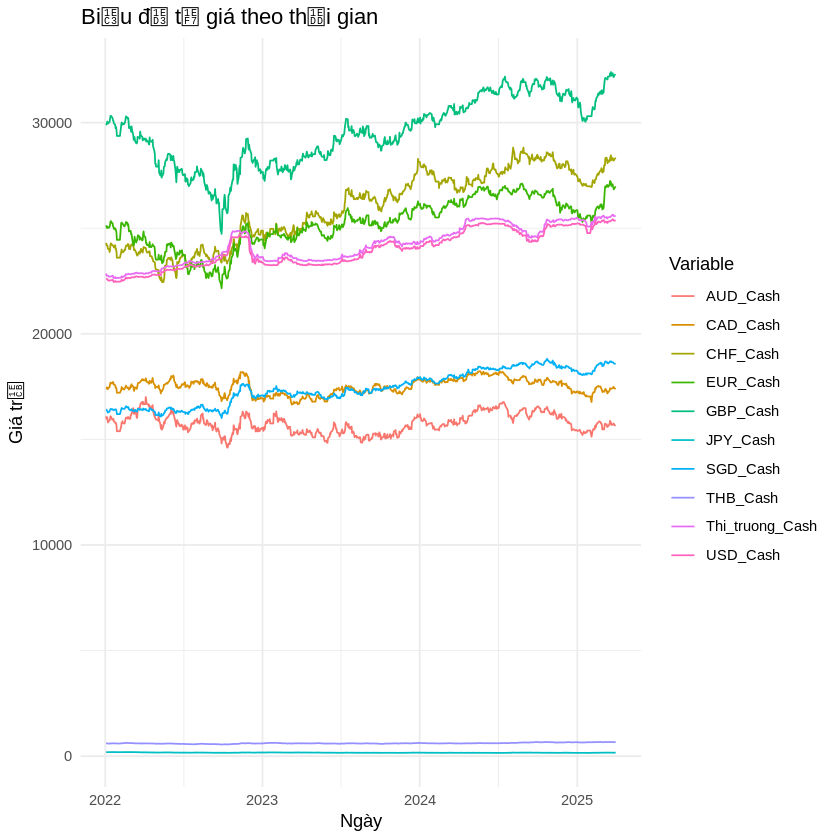

In [ ]:
visualize_comparision_each_bank(vcb_foreign_exchange_rate)

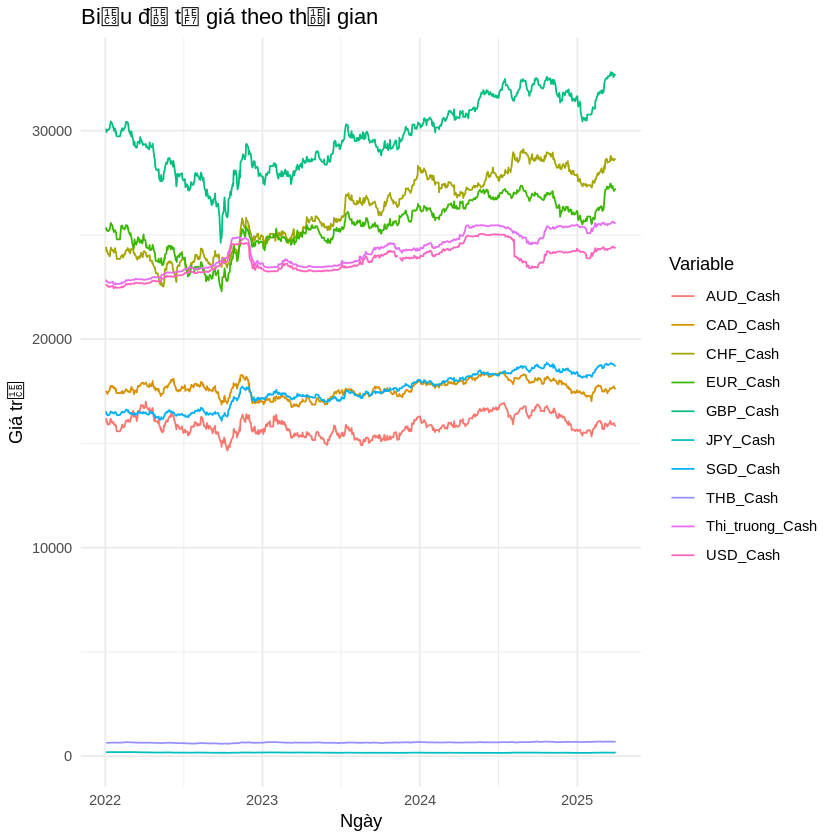

In [ ]:
visualize_comparision_each_bank(bid_foreign_exchange_rate)

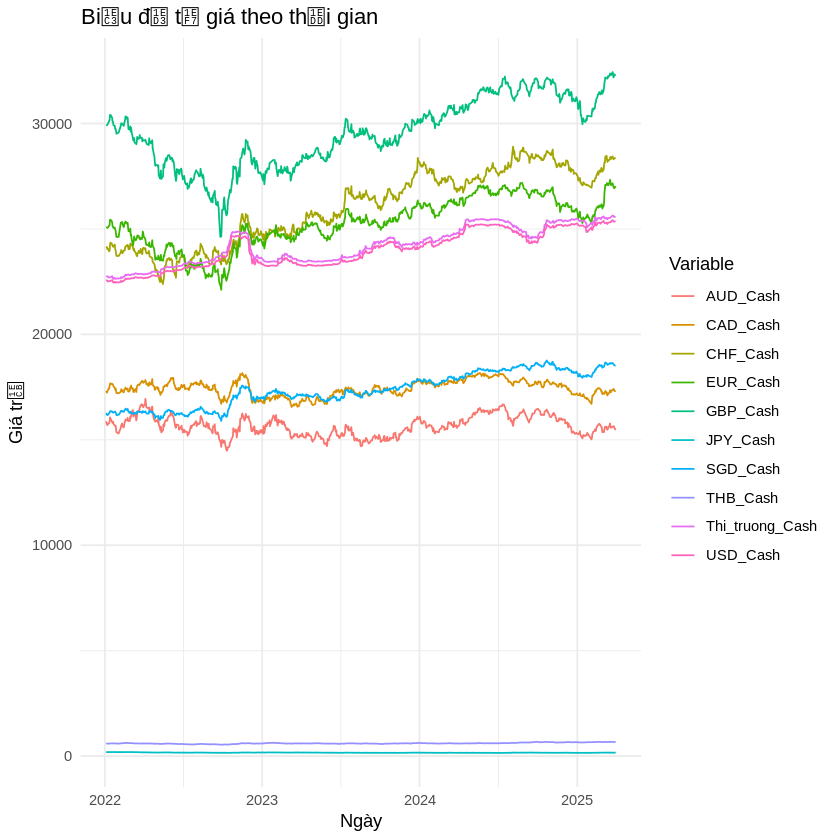

In [ ]:
visualize_comparision_each_bank(tcb_foreign_exchange_rate)

## Comparision between banks

In [ ]:
vcb_foreign_exchange_rate_new <- vcb_foreign_exchange_rate
colnames(vcb_foreign_exchange_rate_new) <- paste0("VCB_", colnames(vcb_foreign_exchange_rate))
colnames(vcb_foreign_exchange_rate_new)[colnames(vcb_foreign_exchange_rate_new) == "VCB_Date"] <- "Date"
head(vcb_foreign_exchange_rate_new, 5)

Date       VCB_AUD_Cash VCB_AUD_Sell VCB_AUD_Transfer VCB_CAD_Cash
1 2021-12-31 16093.17     16780.26     16255.73         17424.97    
2 2022-01-01 16093.17     16780.26     16255.73         17424.97    
3 2022-01-02 16093.17     16780.26     16255.73         17424.97    
4 2022-01-03 16093.17     16780.26     16255.73         17424.97    
5 2022-01-04 15975.54     16657.61     16136.91         17412.67    
  VCB_CAD_Sell VCB_CAD_Transfer VCB_CHF_Cash VCB_CHF_Sell VCB_CHF_Transfer ⋯
1 18168.92     17600.98         24306.81     25344.58     24552.33         ⋯
2 18168.92     17600.98         24306.81     25344.58     24552.33         ⋯
3 18168.92     17600.98         24306.81     25344.58     24552.33         ⋯
4 18168.92     17600.98         24306.81     25344.58     24552.33         ⋯
5 18156.10     17588.55         24187.63     25220.32     24431.95         ⋯
  VCB_JPY_Cash VCB_JPY_Sell VCB_JPY_Transfer VCB_SGD_Cash VCB_SGD_Sell
1 192.01       203.26       193.95           16420.90     17121.98    
2 192.01       203.26       193.95           16420.90     17121.98    
3 192.01       203.26       193.95           16420.90     17121.98    
4 192.01       203.26       193.95           16420.90     17121.98    
5 191.53       202.75       193.46           16408.76     17109.33    
  VCB_SGD_Transfer VCB_THB_Cash VCB_THB_Sell VCB_THB_Transfer VCB_USD_Cash
1 16586.76         603.35       696.19       670.39           22610       
2 16586.76         603.35       696.19       670.39           22610       
3 16586.76         603.35       696.19       670.39           22610       
4 16586.76         603.35       696.19       670.39           22610       
5 16574.50         605.71       698.91       673.02           22610

In [ ]:
bid_foreign_exchange_rate_new <- bid_foreign_exchange_rate
colnames(bid_foreign_exchange_rate_new) <- paste0("BID_", colnames(bid_foreign_exchange_rate))
colnames(bid_foreign_exchange_rate_new)[colnames(bid_foreign_exchange_rate_new) == "BID_Date"] <- "Date"
head(bid_foreign_exchange_rate_new, 5)

Date       BID_AUD_Cash BID_AUD_Sell BID_AUD_Transfer BID_CAD_Cash
1 2022-01-01 16213        16855        16311            17520       
2 2022-01-02 16213        16855        16311            17520       
3 2022-01-03 16213        16855        16311            17520       
4 2022-01-04 16028        16672        16125            17457       
5 2022-01-05 16071        16708        16168            17467       
  BID_CAD_Sell BID_CAD_Transfer BID_CHF_Cash BID_CHF_Sell BID_CHF_Transfer ⋯
1 18251        17626            24429        25431        24577            ⋯
2 18251        17626            24429        25431        24577            ⋯
3 18251        17626            24429        25431        24577            ⋯
4 18188        17562            24211        25213        24357            ⋯
5 18194        17572            24255        25251        24402            ⋯
  BID_JPY_Cash BID_JPY_Sell BID_JPY_Transfer BID_SGD_Cash BID_SGD_Sell
1 193.30       203.64       194.47           16538        17186       
2 193.30       203.64       194.47           16538        17186       
3 193.30       203.64       194.47           16538        17186       
4 191.88       202.14       193.03           16416        17056       
5 191.14       201.33       192.30           16399        17040       
  BID_SGD_Transfer BID_THB_Cash BID_THB_Sell BID_THB_Transfer BID_USD_Cash
1 16637            651.07       717.95       657.65           22635       
2 16637            651.07       717.95       657.65           22635       
3 16637            651.07       717.95       657.65           22635       
4 16515            646.13       712.94       652.66           22585       
5 16498            648.19       715.23       654.74           22555

In [ ]:
tcb_foreign_exchange_rate_new <- tcb_foreign_exchange_rate
colnames(tcb_foreign_exchange_rate_new) <- paste0("TCB_", colnames(tcb_foreign_exchange_rate))
colnames(tcb_foreign_exchange_rate_new)[colnames(tcb_foreign_exchange_rate_new) == "TCB_Date"] <- "Date"
head(tcb_foreign_exchange_rate_new, 5)

Date       TCB_AUD_Cash TCB_AUD_Sell TCB_AUD_Transfer TCB_CAD_Cash
1 2021-12-31 16033        16929        16299            17363       
2 2022-01-04 15879        16769        16144            17324       
3 2022-01-06 15743        16622        16009            17235       
4 2022-01-07 15697        16577        15962            17301       
5 2022-01-08 15769        16659        16034            17415       
  TCB_CAD_Sell TCB_CAD_Transfer TCB_CHF_Cash TCB_CHF_Sell TCB_CHF_Transfer ⋯
1 18264        17635            24325        25325        24676            ⋯
2 18212        17596            24166        25143        24516            ⋯
3 18120        17507            24125        25097        24475            ⋯
4 18189        17573            24036        25013        24386            ⋯
5 18313        17688            24085        25070        24435            ⋯
  TCB_JPY_Cash TCB_JPY_Sell TCB_JPY_Transfer TCB_SGD_Cash TCB_SGD_Sell
1 191.08       203.69       194.38           16353        17248       
2 189.61       202.04       192.90           16269        17154       
3 189.58       202.00       192.87           16186        17065       
4 189.11       201.54       192.40           16172        17052       
5 189.51       202.06       192.80           16214        17106       
  TCB_SGD_Transfer TCB_THB_Cash TCB_THB_Sell TCB_THB_Transfer TCB_USD_Cash
1 16621            603          718          665              22604       
2 16537            599          714          662              22579       
3 16453            595          709          658              22564       
4 16439            590          705          653              22510       
5 16481            591          706          654              22515

In [ ]:
merge_df <- merge(vcb_foreign_exchange_rate_new, bid_foreign_exchange_rate_new, by.x="Date")
merge_df <- merge(merge_df, tcb_foreign_exchange_rate_new, by.x="Date")
colnames(merge_df)

[1] "Date"             "VCB_AUD_Cash"     "VCB_AUD_Sell"     "VCB_AUD_Transfer"
 [5] "VCB_CAD_Cash"     "VCB_CAD_Sell"     "VCB_CAD_Transfer" "VCB_CHF_Cash"    
 [9] "VCB_CHF_Sell"     "VCB_CHF_Transfer" "VCB_EUR_Cash"     "VCB_EUR_Sell"    
[13] "VCB_EUR_Transfer" "VCB_GBP_Cash"     "VCB_GBP_Sell"     "VCB_GBP_Transfer"
[17] "VCB_JPY_Cash"     "VCB_JPY_Sell"     "VCB_JPY_Transfer" "VCB_SGD_Cash"    
[21] "VCB_SGD_Sell"     "VCB_SGD_Transfer" "VCB_THB_Cash"     "VCB_THB_Sell"    
[25] "VCB_THB_Transfer" "VCB_USD_Cash"     "BID_AUD_Cash"     "BID_AUD_Sell"    
[29] "BID_AUD_Transfer" "BID_CAD_Cash"     "BID_CAD_Sell"     "BID_CAD_Transfer"
[33] "BID_CHF_Cash"     "BID_CHF_Sell"     "BID_CHF_Transfer" "BID_EUR_Cash"    
[37] "BID_EUR_Sell"     "BID_EUR_Transfer" "BID_GBP_Cash"     "BID_GBP_Sell"    
[41] "BID_GBP_Transfer" "BID_JPY_Cash"     "BID_JPY_Sell"     "BID_JPY_Transfer"
[45] "BID_SGD_Cash"     "BID_SGD_Sell"     "BID_SGD_Transfer" "BID_THB_Cash"    
[49] "BID_THB_Sell"     "BID_THB_Transfer" "BID_USD_Cash"     "TCB_AUD_Cash"    
[53] "TCB_AUD_Sell"     "TCB_AUD_Transfer" "TCB_CAD_Cash"     "TCB_CAD_Sell"    
[57] "TCB_CAD_Transfer" "TCB_CHF_Cash"     "TCB_CHF_Sell"     "TCB_CHF_Transfer"
[61] "TCB_EUR_Cash"     "TCB_EUR_Sell"     "TCB_EUR_Transfer" "TCB_GBP_Cash"    
[65] "TCB_GBP_Sell"     "TCB_GBP_Transfer" "TCB_JPY_Cash"     "TCB_JPY_Sell"    
[69] "TCB_JPY_Transfer" "TCB_SGD_Cash"     "TCB_SGD_Sell"     "TCB_SGD_Transfer"
[73] "TCB_THB_Cash"     "TCB_THB_Sell"     "TCB_THB_Transfer" "TCB_USD_Cash"

In [ ]:
visualize_each_currency <- function(currency) {
    merge_df <- merge(vcb_foreign_exchange_rate_new, bid_foreign_exchange_rate_new, by.x="Date")
    merge_df <- merge(merge_df, tcb_foreign_exchange_rate_new, by.x="Date")

    selected_cols <- grep(paste0(currency, "_Cash$"), colnames(merge_df), value = TRUE)

    dataframe_long <- merge_df %>%
      pivot_longer(
        cols = all_of(selected_cols),
        names_to = "Variable",
        values_to = "Value"
      )


    ggplot(dataframe_long, aes(x = Date, y = Value, color = Variable)) +
      geom_line() +
      labs(title = "Biểu đồ tỷ giá theo thời gian",
          x = "Ngày", y = "Giá trị") +
      theme_minimal()
}

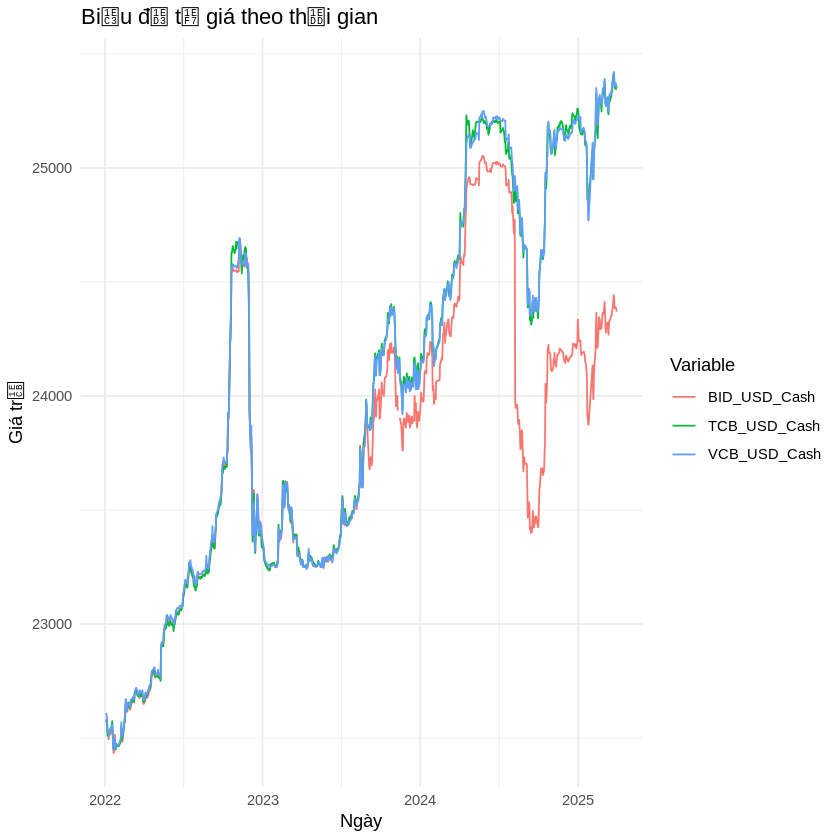

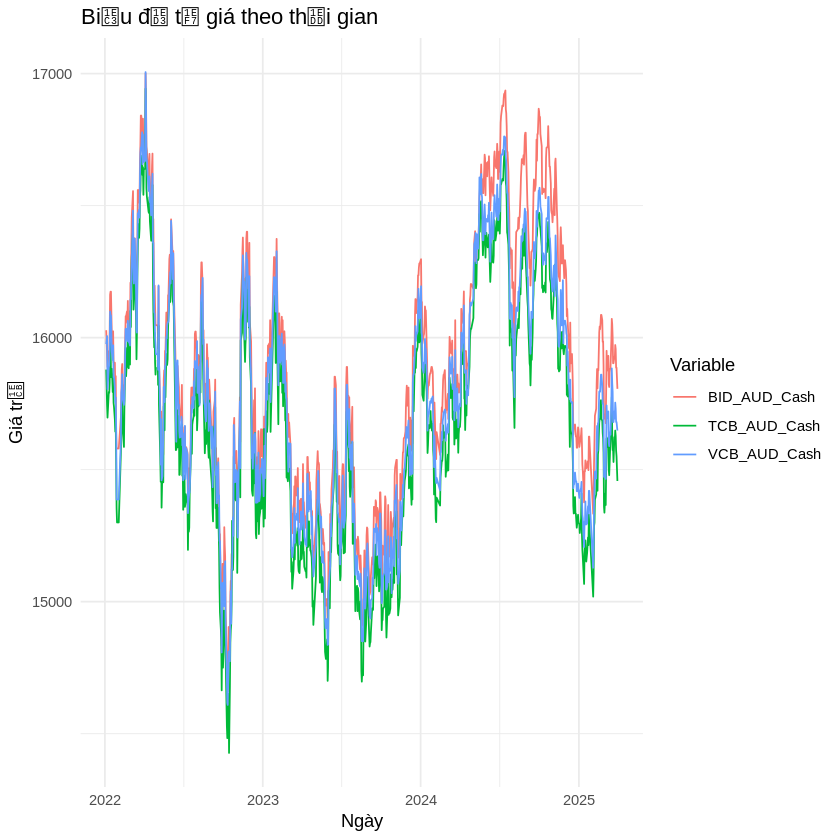

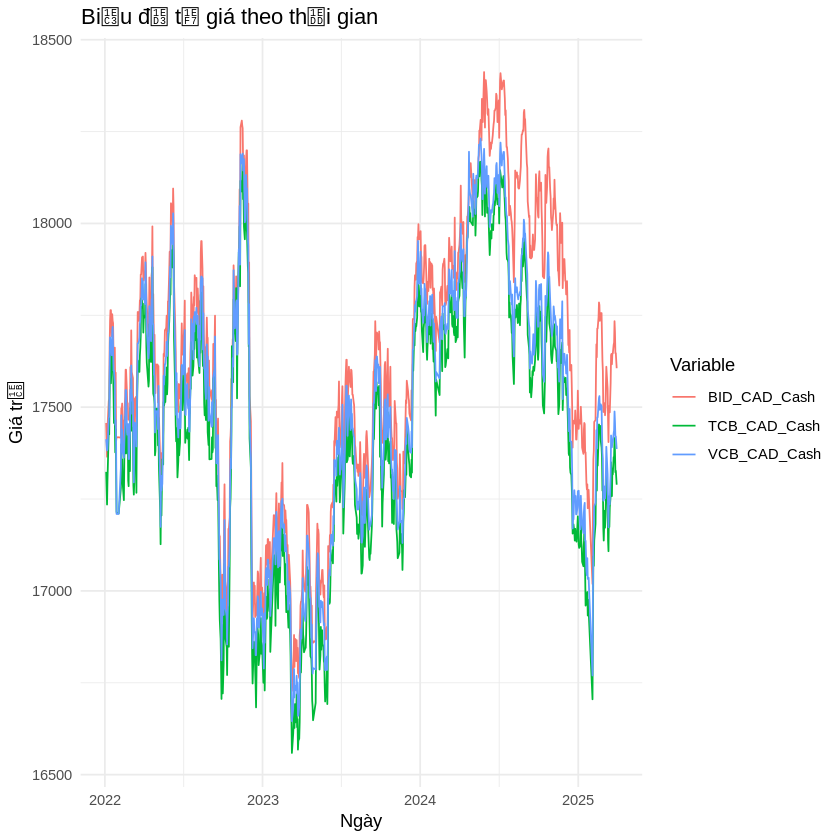

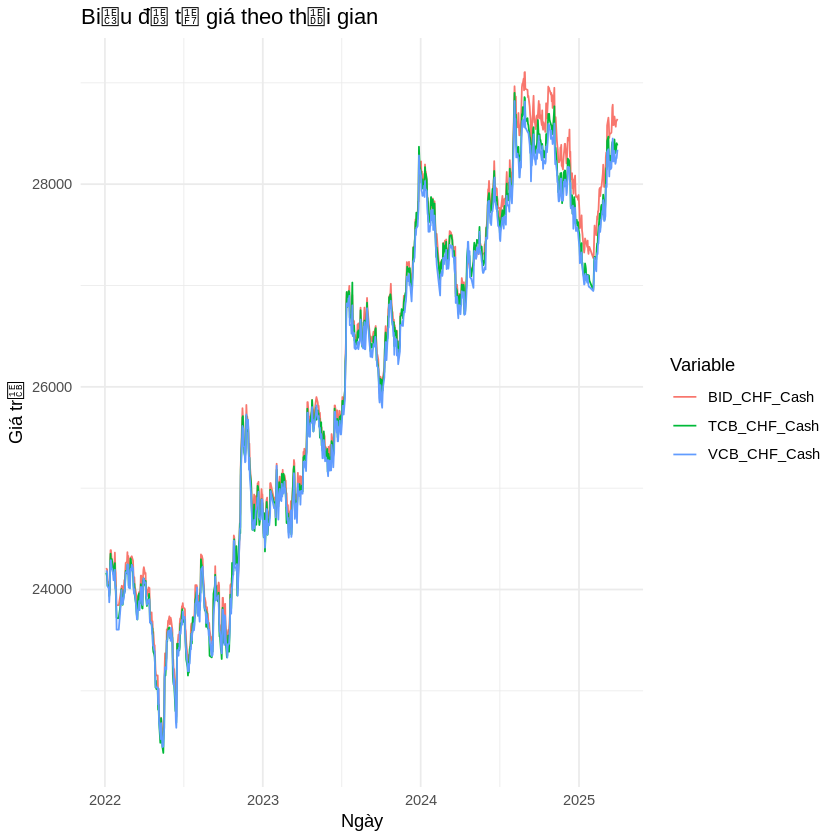

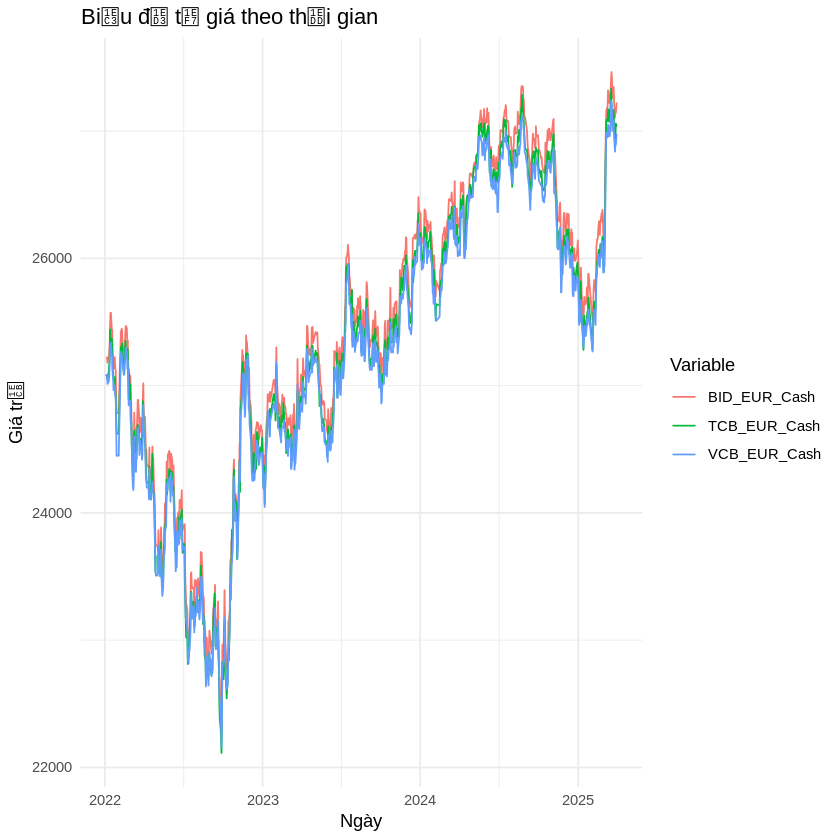

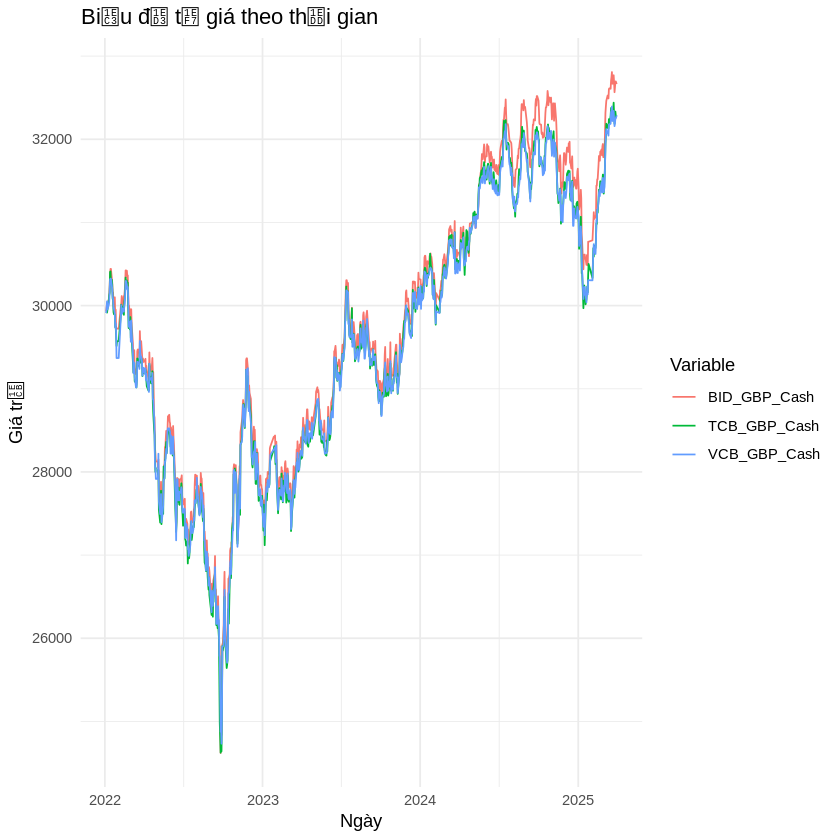

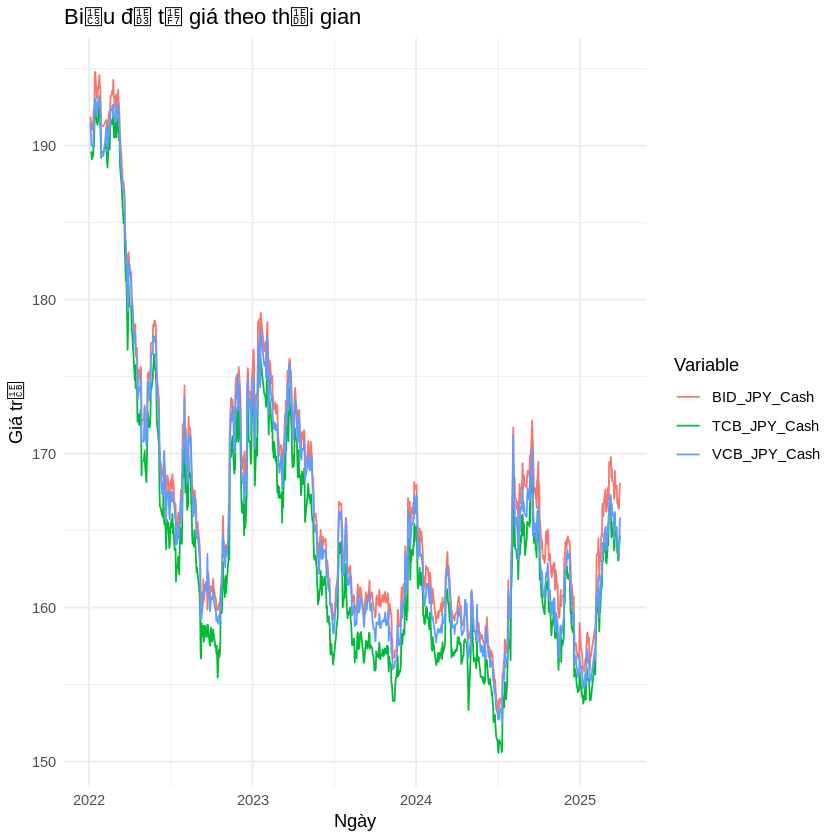

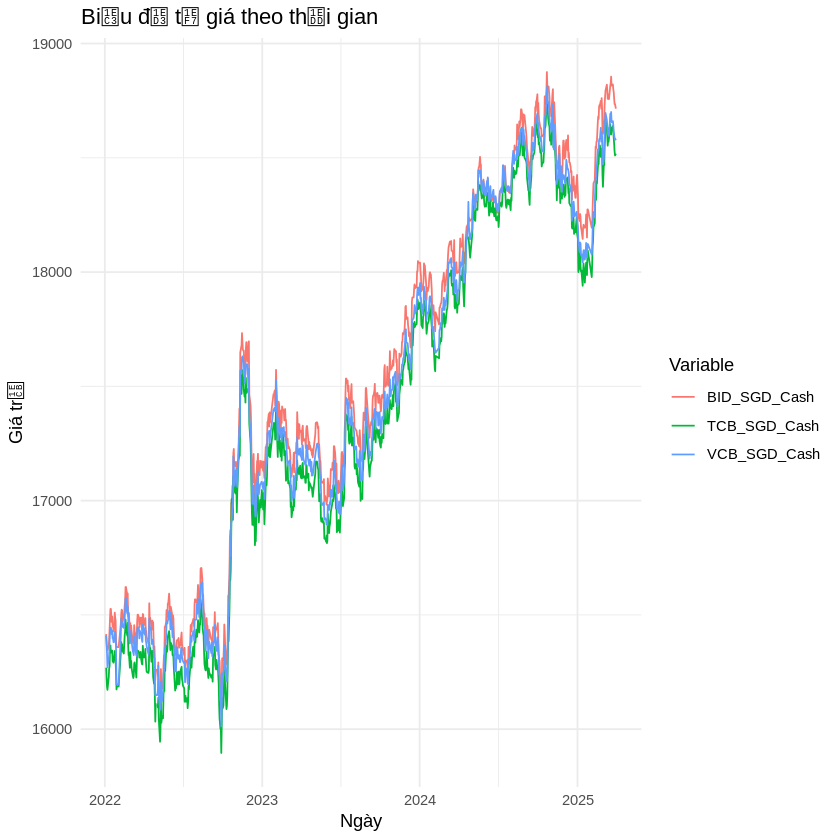

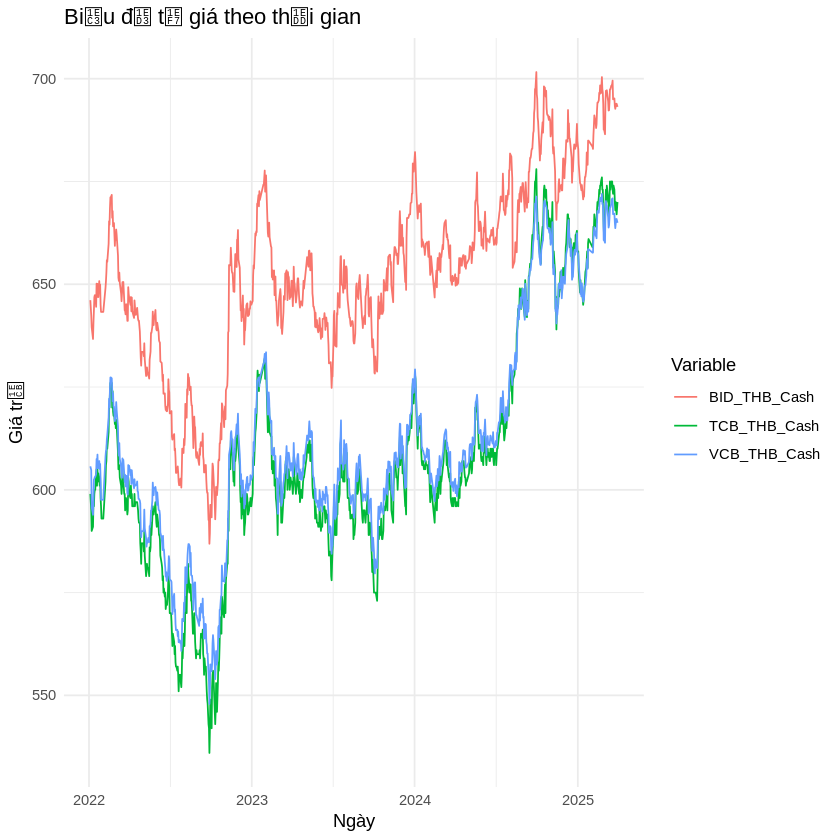

In [ ]:
visualize_each_currency('USD')
visualize_each_currency('AUD')
visualize_each_currency('CAD')
visualize_each_currency('CHF')
visualize_each_currency('EUR')
visualize_each_currency('GBP')
visualize_each_currency('JPY')
visualize_each_currency('SGD')
visualize_each_currency('THB')